In [1]:
import csv
import pandas as pd
import numpy as np
import calendar
import matplotlib.pyplot as plt
from __future__ import division
from datetime import datetime, timedelta
import statsmodels.api as sm
import holidays

C:\Users\kcheng\AppData\Local\Continuum\anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Read the 1990 M&A deals from file and generate a csv file that pull EPS data from bloomberg

#### Extracted one thousand nine hundread and ninty M&A deals based on below criteria
- Deal Status: Pending, Completed, Terminated
- Dates: 1/1/2010 to 12/12/2017
- Deal Type: M&A
- Exchange: Include: United States, Apply to Target
- Payment date: Cash, Stock, Cash & Stock, Cash or Stock
- Public/Private: Public, Apply to Target
- Deal Size: 400 million dollars

In [603]:
base_dir = './/'

def get_ma_cash_deals(filename):
    ma_deals = pd.read_csv(filename, header=0)

    ma_deals = ma_deals[ma_deals['Payment Type'] == 'Cash']
    print 'Cash deals: ' + str(len(ma_deals))
    ma_deals = ma_deals[ma_deals['Cash Terms'].notnull()]
    print 'Cash Terms excluded NA deals: ' + str(len(ma_deals))
    ma_deals = ma_deals[~ma_deals['Cash Terms'].str.contains('Mln')]
    print 'Cash Terms in per share deals: ' + str(len(ma_deals))
    ma_deals = ma_deals[ma_deals['Target Ticker'].notnull()]
    print 'Target Ticker not null deals: ' + str(len(ma_deals))
    print 'Unique target ticker count: ' + str(len(ma_deals['Target Ticker'].unique()))
    print 'Total Cash deals count at the end: ' + str(len(ma_deals))
    return ma_deals
ma_deals = get_ma_cash_deals(base_dir + 'ma_deals_sh.csv')
ma_deals

Cash deals: 1313
Cash Terms excluded NA deals: 1312
Cash Terms in per share deals: 1235
Target Ticker not null deals: 1235
Unique target ticker count: 1139
Total Cash deals count at the end: 1235


,Action ID,Announce Date,Target Ticker,Target Name,Acquirer Ticker,Announced Total Value (mil.),Payment Type,Deal Status,Completion/Termination Date,Cash Terms,Target Industry Sector
0,69224411,9/27/2012,ZZ US,Sealy Corp,TPX US,909.51,Cash,Completed,3/18/2013,2.2,"Consumer, Cyclical"
2,112314918,11/6/2015,ZSPH US,ZS Pharma Inc,AZN LN,2037.60,Cash,Completed,12/18/2015,90,"Consumer, Non-cyclical"
3,125179220,5/5/2016,ZPIN US,Zhaopin Ltd,NaN,487.80,Cash,Pending,,17.75,Communications
4,81900649,9/26/2013,ZOLT US,Zoltek Cos Inc,3402 JP,575.46,Cash,Completed,3/3/2014,16.75,Basic Materials
5,62404789,3/12/2012,ZOLL US,Zoll Medical Corp,3407 JP,2062.85,Cash,Completed,4/30/2012,93,"Consumer, Non-cyclical"
6,43195085,2/18/2010,ZNT US,Zenith National Insurance Corp,FFH CN,1320.99,Cash,Completed,5/21/2010,38,Financial
7,140287996,2/13/2017,ZLTQ US,Zeltiq Aesthetics Inc,AGN US,2309.42,Cash,Completed,5/1/2017,56.5,"Consumer, Non-cyclical"
8,87551829,2/19/2014,ZLC US,Zale Corp,SIG US,1198.06,Cash,Completed,5/30/2014,21,"Consumer, Cyclical"
9,56303521,7/20/2011,ZL CN,Microsemi Semiconductor Corp,MSCC US,448.94,Cash,Completed,10/31/2011,3.98,Technology
10,72579414,1/2/2013,ZIP US,Zipcar Inc,CAR US,509.92,Cash,Completed,3/15/2013,12.25,"Consumer, Non-cyclical"


##### Eliminate the fake break deals. Manually change the below 4 tickers plus 6753 JP

In [604]:
duplicated_cash_ma_deals = ma_deals[ma_deals['Target Ticker'].duplicated()]
print len(duplicated_cash_ma_deals['Target Ticker'].unique())
tt_count = ma_deals.groupby(['Target Ticker']).size().reset_index(name='count')
dtt_deals = tt_count[tt_count['count'] > 1]
print 'Duplicated target ticker count: %d' % len(dtt_deals)
dtt_deals[dtt_deals['count'] > 2]

96
Duplicated target ticker count: 96


,Target Ticker,count


In [605]:
ma_deals = get_ma_cash_deals(base_dir + 'ma_deals_sh_filtered.csv')

tt_count = ma_deals.groupby(['Target Ticker']).size().reset_index(name='count')
dtt_deals_tickers = tt_count[tt_count['count'] > 1]

Cash deals: 1312
Cash Terms excluded NA deals: 1311
Cash Terms in per share deals: 1234
Target Ticker not null deals: 1234
Unique target ticker count: 1139
Total Cash deals count at the end: 1234


In [606]:
duplicated_cash_ma_deals = ma_deals[ma_deals['Target Ticker'].duplicated(keep=False)]
len(duplicated_cash_ma_deals['Target Ticker'].unique())

95

In [607]:
unique_cash_ma_deals = ma_deals[~ma_deals['Target Ticker'].duplicated(keep=False)]
len(unique_cash_ma_deals)

1044

In [608]:
unique_cash_ma_deals.to_csv('unique_cash_ma_deals.csv', index=False)
ter_unique_targets_count = len(unique_cash_ma_deals[unique_cash_ma_deals['Deal Status'] == 'Terminated'])
print 'Number of unique Target name got terminated: ' + str(ter_unique_targets_count)

Number of unique Target name got terminated: 97


In [609]:
duplicated_cash_ma_deals = duplicated_cash_ma_deals.sort_values(by=['Target Ticker', 'Announce Date'], ascending=[True, False])

In [610]:
duplicated_cash_ma_deals.to_csv('duplicated.csv', index=False)

In [611]:
ter_duplicated_targets_count = len(duplicated_cash_ma_deals[duplicated_cash_ma_deals['Deal Status'] == 'Terminated'])
print 'Number of Duplicated Target name got terminated: ' + str(ter_duplicated_targets_count)

Number of Duplicated Target name got terminated: 88


In [612]:
def is_overlapping(a_s_date, a_e_date, b_s_date, b_e_date):
    a_s_date = datetime.strptime(a_s_date, '%m/%d/%Y')
    a_e_date = datetime.strptime(a_e_date, '%m/%d/%Y')
    b_s_date = datetime.strptime(b_s_date, '%m/%d/%Y')
    b_e_date = datetime.strptime(b_e_date, '%m/%d/%Y')
    if b_s_date <= a_e_date and a_e_date <= b_e_date:
        return True
    if a_s_date <= b_e_date and b_e_date <= a_s_date:
        return True
    if b_s_date <= a_s_date and a_s_date <= b_e_date:
        return True
    if a_s_date <= b_s_date and b_s_date <= a_e_date:
        return True
    return False

def get_start_close_date_price_status(a_s_date, a_e_date, b_s_date, b_e_date, a_cash_term, b_cash_term, a_status, b_status):
    s_date = min(a_s_date, b_s_date)
    e_date = max(a_e_date, b_e_date)
    cash_term = max(a_cash_term, b_cash_term)
    if a_status == b_status:
        status = a_status
    else:
        # may be pending
        if a_status == 'Pending' or a_status == 'Completed':
            status = a_status
        else:
            status = b_status
    return s_date, e_date, cash_term, status

def add_180_days(date):
    try:
        date = datetime.strptime(date.strip(), '%m/%d/%Y')
    except:
#         if date <= datetime.today():
        date = datetime.today() + timedelta(days=180)
    return datetime.strftime(date, '%m/%d/%Y')
    
def filter_fake_break_deals(duplicated_cash_ma_deals):
    filtered_deals = []
    count = 0
    fir_row = None
    sec_row = None           
    for i, row in duplicated_cash_ma_deals.iterrows():
        count += 1
        if count % 2 == 0:
            sec_row = row
            a_s_date, a_e_date, b_s_date, b_e_date = fir_row['Announce Date'], fir_row['Completion/Termination Date'], sec_row['Announce Date'], sec_row['Completion/Termination Date']
            a_e_date = add_180_days(a_e_date)
            b_e_date = add_180_days(b_e_date)
            if is_overlapping(a_s_date, a_e_date, b_s_date, b_e_date):
                # when there is an overlapping period in 2 deals and both have same status,
                # i.e. both completed or terminated, then count as one deal with the longest 
                # period
                s_date, e_date, cash_term, status = get_start_close_date_price_status(
                                    a_s_date, a_e_date, b_s_date, b_e_date,
                                    fir_row['Cash Terms'], sec_row['Cash Terms'],
                                    fir_row['Deal Status'], sec_row['Deal Status'])
                fir_row['Announce Date'] = s_date
                fir_row['Completion/Termination Date'] = e_date
                fir_row['Cash Terms'] = cash_term
                fir_row['Deal Status'] = status
                filtered_deals.append(fir_row.to_frame().transpose())
            else:
                # add both rows to the new df
                filtered_deals.append(fir_row.to_frame().transpose())
                filtered_deals.append(sec_row.to_frame().transpose())
        else:
            fir_row = row
        
    return pd.concat(filtered_deals)

filtered_deals = filter_fake_break_deals(duplicated_cash_ma_deals)

In [613]:
filtered_deals.to_csv('filtered_deals.csv', index=False)

In [614]:
# ma_deals = pd.concat([unique_cash_ma_deals, duplicated_cash_ma_deals])
ma_deals = pd.concat([unique_cash_ma_deals, filtered_deals])
# (duplicated_cash_ma_deals.groupby(["Target Ticker", "Announce Date"])['Action ID'].count() > 1)

In [615]:
len(filtered_deals[filtered_deals['Deal Status']=='Pending'])

8

In [616]:
len(ma_deals)

1174

In [617]:
import holidays

def get_pre_holiday_day(date):
    day_dict = {0:'Mon', 1:'Tues', 2:'Wed', 3:'Thur', 4:'Fri', 5:'Sat', 6:'Sun'}
    us_holidays = holidays.UnitedStates()
#     if date != np.datetime64('NaT'):
    if isinstance(date, str):
        datetime_date = datetime.strptime(date, '%m/%d/%Y')
        day_num = datetime_date.weekday()
        if us_holidays.get(datetime_date):
            date = datetime_date - timedelta(days=1)
            date = datetime.strftime(date, '%m/%d/%Y')
            return get_pre_holiday_day(date)
        if day_num >= 5:
            date = datetime_date - timedelta(days=(day_num - 4))
            date = datetime.strftime(date, '%m/%d/%Y')
            return get_pre_holiday_day(date)
        date = date.split('/')
        date = date[0].lstrip('0') + '/' + date[1].lstrip('0') + '/' + date[2]
        return date
    else:
        return date

In [618]:
import holidays
day_dict = {0:'Mon', 1:'Tues', 2:'Wed', 3:'Thur', 4:'Fri', 5:'Sat', 6:'Sun'}
us_holidays = holidays.UnitedStates()
ma_deals_holidays = []
# for date in ma_deals_eps_pull['Date F'].values:
for date in res['Date F'].values:
    if date != np.datetime64('NaT'):
        datetime_date = date.astype('M8[D]').astype('O')
        day_num = datetime_date.weekday()
        if day_num >= 5:
            print 'weekend ' + str(date) + ' ' + day_dict[day_num]
            ma_deals_holidays.append(str(date))
        else:
            if us_holidays.get(datetime_date):
                print 'US holiday ' + str(date) + ' ' + day_dict[day_num]
                ma_deals_holidays.append(str(date))
print len(ma_deals_holidays)

0


In [619]:
print len(ma_deals[ma_deals['Deal Status'] == 'Completed'])
print len(ma_deals[ma_deals['Deal Status'] == 'Terminated'])
print len(ma_deals[ma_deals['Deal Status'] == 'Pending'])

978
136
60


In [620]:
def avg_duration(df, deal_status):
    sum_duration = (df['Completion/Termination Date'].apply(lambda date : datetime.strptime(date, '%m/%d/%Y')) - df['Announce Date'].apply(lambda date : datetime.strptime(date, '%m/%d/%Y'))).astype('timedelta64[D]').sum()
    avg_days = sum_duration / len(df)
    print 'Number of deals: %s. Average number of days spent on %s deals: %s' % (len(df), deal_status, str(avg_days))
    return avg_days

completed_deals = ma_deals[ma_deals['Deal Status'] == 'Completed']
completed_avg_days = avg_duration(completed_deals, 'Completed')
# for industry in completed_deals['Target Industry Sector'].unique():
#     deals = completed_deals[completed_deals['Target Industry Sector'] == industry]
#     avg_duration(deals, industry)
# print
terminated_deals = ma_deals[ma_deals['Deal Status'] == 'Terminated']
terminated_avg_days = avg_duration(terminated_deals, 'Terminated')
# for industry in terminated_deals['Target Industry Sector'].unique():
#     deals = terminated_deals[terminated_deals['Target Industry Sector'] == industry]
#     avg_duration(deals, industry)
# print
# for industry in ma_deals['Target Industry Sector'].unique():
#     deals = ma_deals[ma_deals['Target Industry Sector'] == industry]
#     print industry + ': ' + str(len(deals))

Number of deals: 978. Average number of days spent on Completed deals: 132.568507157
Number of deals: 136. Average number of days spent on Terminated deals: 131.727941176


In [621]:
target_tickers = ma_deals['Target Ticker']
print 'Number of NaN target ticker(s): %s' % pd.isnull(target_tickers).sum()

def write_BDS_csv(filename, tickers):
    with open(filename, 'wb') as csvfile:
        writer = csv.writer(csvfile, quoting=csv.QUOTE_NONE, escapechar ='\\')
        for ticker in tickers.dropna():
            writer.writerow([ticker])
            writer.writerow([r'=BDS("%s Equity","EARN_ANN_DT_TIME_HIST_WITH_EPS")' % ticker])
            for i in range(150):
                writer.writerow('')

    with open(filename, 'rb') as f:
        data = f.read()
    with open(filename, 'wb') as g:
        g.write(data.replace('\\"', '\"').replace('Equity\"\\', 'Equity\"'))

write_BDS_csv(base_dir + '1990_ma_deals_eps_hist.csv', target_tickers)

Number of NaN target ticker(s): 0


### After pulling EPS from Bloomberg, analyze the stock price movement during earnings announcement throughout the period between announce date and completion/termination date

#### change the header name, drop the empty lines (NA), format the date to datetime object

In [622]:
def load_df(filename, columns, format_date=False, reindex=True, pre_holiday=False):
    df = pd.read_csv(filename, header=None)
    df.columns = columns
    df = df.dropna(axis=0, how='all')
    if pre_holiday:
        df['Date'] = df['Date'].apply(lambda date : get_pre_holiday_day(date))
    if format_date:
        df['Date F'] = pd.to_datetime(df['Date'], errors='coerce')
    df = df.reset_index(drop=reindex)
    return df

def cal_eps_diff(df):
    df['Est EPS diff'] = (df['EPS'] - df['Est EPS'])
#     df['Peer EPS diff'] = (df['EPS'] - df['Peer EPS'])
    df['Est EPS diff percentage'] = df['Est EPS diff'] / abs(df['Est EPS'])
#     df['Peer EPS diff percentage'] = df['Peer EPS diff'] / abs(df['EPS'])
    

ma_deals_eps_pull = load_df(base_dir + '1990_ma_deals_eps_pull.csv', 
                                 ['Quarter', 'Date', 'Time', 'Unknown', 'EPS', 'Est EPS'],
                                format_date=True, pre_holiday=True)
cal_eps_diff(ma_deals_eps_pull)
ma_deals_eps_pull

,Quarter,Date,Time,Unknown,EPS,Est EPS,Date F,Est EPS diff,Est EPS diff percentage
0,ZZ US,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
1,2012:Q4,1/23/2013,16:01,0.0086,0.040,NaN,2013-01-23,NaN,NaN
2,2012:Q3,9/27/2012,7:05,0.0025,0.000,NaN,2012-09-27,NaN,NaN
3,2012:Q2,6/26/2012,16:01,0.0408,0.020,NaN,2012-06-26,NaN,NaN
4,2012:Q1,3/27/2012,16:01,0.0154,0.020,NaN,2012-03-27,NaN,NaN
5,2011:Q4,1/18/2012,16:01,-0.1403,-0.140,NaN,2012-01-18,NaN,NaN
6,2011:Q3,9/27/2011,16:02,0.0400,0.040,NaN,2011-09-27,NaN,NaN
7,2011:Q2,6/28/2011,16:01,0.0100,0.020,NaN,2011-06-28,NaN,NaN
8,2011:Q1,3/29/2011,16:14,0.0010,0.000,NaN,2011-03-29,NaN,NaN
9,2010:Q4,1/13/2011,16:01,0.0305,0.030,NaN,2011-01-13,NaN,NaN


In [623]:
def load_ticker_dict(df, index_col, first_col):
    ticker_index_list = df[df[index_col].isnull()].index
    ticker_price_dict = dict()
    for i in range(len(ticker_index_list)):
        start_index = ticker_index_list[i]+1
        ticker = df[first_col][ticker_index_list[i]]
        if i == len(ticker_index_list) - 1:
            end_index = len(df)
        else:
            end_index = ticker_index_list[i+1]
        ticker_price_dict[ticker] = df[start_index:end_index]
    return ticker_price_dict

ticker_dict = load_ticker_dict(ma_deals_eps_pull, 'Date', 'Quarter')
ticker_dict['ZPIN US']

,Quarter,Date,Time,Unknown,EPS,Est EPS,Date F,Est EPS diff,Est EPS diff percentage
55,2017:Q4,8/15/2017,19:00,1.02,NaN,NaN,2017-08-15,NaN,NaN
56,2017:Q3,5/22/2017,18:00,0.84,NaN,NaN,2017-05-22,NaN,NaN
57,2017:Q2,2/17/2017,16:50,-0.08,NaN,NaN,2017-02-17,NaN,NaN
58,2017:Q1,11/23/2016,17:00,1.42,NaN,NaN,2016-11-23,NaN,NaN
59,2016:Q4,8/19/2016,18:30,1.56,3.20,1.070,2016-08-19,2.130,1.990654
60,2016:Q3,5/23/2016,16:40,1.08,0.96,1.270,2016-05-23,-0.310,-0.244094
61,2016:Q2,2/24/2016,16:40,1.08,1.16,1.357,2016-02-24,-0.197,-0.145173
62,2016:Q1,11/18/2015,17:00,1.24,2.64,1.337,2015-11-18,1.303,0.974570
63,2015:Q4,8/18/2015,17:55,1.28,1.32,1.287,2015-08-18,0.033,0.025641
64,2015:Q3,5/26/2015,17:55,1.02,0.57,NaN,2015-05-26,NaN,NaN


#### For each Action ID (deal), extract the EPS between announcement date and completed/termination date. Some deal has no EPS info retrieved from Bloomberg because it's turned private.

In [624]:
today_date = datetime.now()
actionid_eps_dict = dict()
for index, row in ma_deals.iterrows():
    deal_status = row['Deal Status']
    ann_date = datetime.strptime(row['Announce Date'], '%m/%d/%Y')
    try:
        end_date = datetime.strptime(row['Completion/Termination Date'].strip(), '%m/%d/%Y')
    except:
        end_date = today_date
    if deal_status == 'Pending':
        if end_date <= today_date:
            end_date += timedelta(days=180)
       
    ticker = row['Target Ticker']
    if not isinstance(ticker, str):  # some target tickers are missing
        continue
    actionid = row['Action ID']
    ticker_eps_df = ticker_dict[ticker]
    ticker_eps_df = ticker_eps_df.loc[ticker_eps_df['Date F'] > ann_date].loc[ticker_eps_df['Date F'] < end_date]
    actionid_eps_dict[actionid] = ticker_eps_df

#### Create csv file that has the BHD bloomberg add-in function generated to pull historical prices for each ticker

In [625]:
today_date = datetime.now()
ticker_date_dict = dict()
for t in target_tickers.dropna().unique():
    df = ma_deals.loc[ma_deals['Target Ticker'] == t]
    ann_date = min([datetime.strptime(date, '%m/%d/%Y') for date in df['Announce Date'].values])
    end_date = max([datetime.strptime(date, '%m/%d/%Y') if len(date.strip()) != 0 else today_date for date in df['Completion/Termination Date'].values])
    if end_date > today_date:
        end_date = today_date
    if t not in ticker_date_dict.keys():
        ticker_date_dict[t] = [ann_date, end_date]
#     if ann_date == end_date:
#         print t, end_date
print len(ticker_date_dict)

1139


In [626]:
with open(base_dir + '1990_ma_deals_BHD_price.csv', 'wb') as csvfile:
    writer = csv.writer(csvfile, quoting=csv.QUOTE_NONE, escapechar ='\\')
    for ticker in target_tickers.dropna():
        writer.writerow([ticker])
        # give some buffer for the weekend
        ann_date = min(ticker_date_dict[ticker]) - timedelta(days=10)
        end_date = max(ticker_date_dict[ticker]) + timedelta(days=10)
        str_ann_date = datetime.strftime(ann_date, '%m/%d/%Y')
        str_end_date = datetime.strftime(end_date, '%m/%d/%Y')
        writer.writerow([r'=BDH("%s Equity","Px_Last","%s","%s")' % (ticker, str_ann_date, str_end_date)])
        num_of_date = (end_date - ann_date).days + 1
        for i in range(num_of_date):
            writer.writerow('')
            
with open(base_dir + '1990_ma_deals_BHD_price.csv', 'rb') as f:
    data = f.read()
with open(base_dir + '1990_ma_deals_BHD_price.csv', 'wb') as g:
    g.write(data.replace('\\"', '\"').replace('Equity\"\\', 'Equity\"').replace('\"\\', '\"'))

#### Load the historical prices that are pulled from Bloomeberg into dataframe and dict. The daily return is in percentage

In [627]:
ma_deals_price_pull = load_df(base_dir + '1990_ma_deals_BHD_price_pull.csv', ['Date', 'Price'])

In [630]:
def add_price_lag(df, lag, forward=1):
    '''this add both the price lag and lag-days return to df'''
    df['Price Return lag' + str(lag)] = df.Price.pct_change(periods=lag).shift(-lag+forward) * 100
    df['t+1 - t'] = (((df.Price/df.Price.shift(1))-1)*100).shift(-1)
    df['t - t-1'] = df['t+1 - t'].shift(1)
    df['t+1 - t-1'] = (((df.Price.shift(-1)/df.Price.shift(1))-1)*100)
lag = 2
forward = 2
lags = range(4,5)
for lag in lags:
    add_price_lag(ma_deals_price_pull, lag, forward=forward)
ma_deals_price_pull

,Date,Price,Price Return lag4,t+1 - t,t - t-1,t+1 - t-1
0,ZZ US,NaN,NaN,NaN,NaN,NaN
1,9/17/2012,2.05,NaN,-1.951220,NaN,NaN
2,9/18/2012,2.01,NaN,2.487562,-1.951220,0.487805
3,9/19/2012,2.06,7.317073,-0.970874,2.487562,1.492537
4,9/20/2012,2.04,8.457711,7.843137,-0.970874,6.796117
5,9/21/2012,2.20,3.883495,-0.909091,7.843137,6.862745
6,9/24/2012,2.18,4.901961,-1.834862,-0.909091,-2.727273
7,9/25/2012,2.14,-0.454545,0.000000,-1.834862,-1.834862
8,9/26/2012,2.14,0.000000,2.336449,0.000000,2.336449
9,9/27/2012,2.19,2.336449,-0.456621,2.336449,1.869159


In [631]:
def remove_last_n_rows(price_dict, lag, forward):
    # delete the last len(df) - (lag-forward) rows because the returns are not available
    for ticker, df in price_dict.items():
        price_dict[ticker] = df[: len(df) - (lag-forward)]
    return price_dict
    
ticker_price_dict = load_ticker_dict(ma_deals_price_pull, 'Price', 'Date')
ticker_price_dict = remove_last_n_rows(ticker_price_dict, 4, 2)

In [493]:
import re
def choose_return(time):
    returns = []
#     for time in time:
    if isinstance(time, str):
        if ':' in time:
            four = datetime.strptime('16:00', '%H:%M')
            if re.findall('AM', time, re.IGNORECASE) or re.findall('PM', time, re.IGNORECASE):
                time = datetime.strptime(time, '%I:%M%p')
            else:
                time = datetime.strptime(time, '%H:%M')
            time_diff = (four - time).total_seconds()
            if time_diff > 0:
                returns.append('t - t-1')
            else:
                returns.append('t+1 - t')
        elif 'Bef-mkt' == time:
            returns.append('t - t-1')
        elif 'Aft-mkt' == time:
            returns.append('t+1 - t')
        else:
            returns.append('t+1 - t-1')
    else:
        returns.append('t+1 - t-1')
    return returns[0]
        
# print choose_return('08:00PM')
# print choose_return('20:30')
# print choose_return('Aft-mkt')
# print choose_return('Bef-mkt')
# print choose_return(ma_deals_eps_pull['Time'].values[0])

#### each eps date has a return %, take the mean and std of the returns across all stocks. Store the mean and std of returns for each Action ID

In [632]:
# picking the one-day return according to the time
no_eps_list = []
concat_eps_return_list = []
for index, row in ma_deals.iterrows():
    actionid = row['Action ID']
    target_ticker = row['Target Ticker']
    if str(target_ticker) != 'nan':  # 4 tickers are nan in our MA deals
#         if actionid == 132864185:
            eps_df = actionid_eps_dict[actionid]
            df = eps_df.merge(ticker_price_dict[target_ticker], on='Date', how='left')
            df['Action ID'] = actionid
            df['Target Ticker'] = target_ticker
            df['Payment Type'] = row['Payment Type']
            df['Target Industry Sector'] = row['Target Industry Sector']
            df['Cash Terms'] = row['Cash Terms']
            
            for lag in lags:
                col_name = 'Price Return lag' + str(lag)
                ma_deals.loc[index, 'Mean ' + col_name] = df[col_name].mean()
                ma_deals.loc[index, 'Mean t+1 - t'] = df['t+1 - t'].mean()
                ma_deals.loc[index, 'Mean t - t-1'] = df['t - t-1'].mean()
                ma_deals.loc[index, 'Mean t+1 - t-1'] = df['t+1 - t-1'].mean()
                
            if len(df):  # some deals have no earnings reported during the deal period
                df['Return Used'] = [row[choose_return(row['Time'])] for index, row in df.iterrows()]
                concat_eps_return_list.append(df)
            else:
                no_eps_list.append(actionid)
                
def determine_delta_spread(res):
    delta_spread = []
    delta_spread_percentage = []
    for i, row in res.iterrows():
        time = choose_return(row['Time'])
        delta = 0
        delta_percentage = 0
        if time == 't+1 - t-1' or time == 't+1 - t':
            time = 't+1 - t'
            delta = row[time + ' Spread'] - row['Spread']
            if row['Spread'] != 0:
                delta_percentage = delta / row['Spread']
            else:
                delta_percentage = None
        else:
            delta = row['Spread'] - row[time + ' Spread']
            if row[time + ' Spread'] != 0:
                delta_percentage = delta / row[time + ' Spread']
            else:
                delta_percentage = None
        delta_spread.append(delta)
        delta_spread_percentage.append(delta_percentage)
    return delta_spread, delta_spread_percentage
    
res = pd.concat(concat_eps_return_list)
res['Cash Terms'] = res['Cash Terms'].astype(float)
res['Spread'] = (res['Cash Terms'] - res['Price']) / res['Price']
res['t+1 - t Price'] = res['Price'] * (1 + res['t+1 - t'] / 100)
res['t+1 - t Spread'] = (res['Cash Terms'] - res['t+1 - t Price']) / res['t+1 - t Price']

res['t - t-1 Price'] = res['Price'] / (1 + res['t - t-1'] / 100)
res['t - t-1 Spread'] = (res['Cash Terms'] - res['t - t-1 Price']) / res['t - t-1 Price']

res['Delta Spread'], res['Delta Spread percentage'] = determine_delta_spread(res)
res = res[res['Est EPS diff percentage'].notnull()]
res = res[res['Price'].notnull()]

ma_deals

,Action ID,Announce Date,Target Ticker,Target Name,Acquirer Ticker,Announced Total Value (mil.),Payment Type,Deal Status,Completion/Termination Date,Cash Terms,Target Industry Sector,Mean Price Return lag4,Mean t+1 - t,Mean t - t-1,Mean t+1 - t-1
0,69224411,9/27/2012,ZZ US,Sealy Corp,TPX US,909.51,Cash,Completed,3/18/2013,2.2,"Consumer, Cyclical",0.000000,-0.917431,0.000000,-0.917431
2,112314918,11/6/2015,ZSPH US,ZS Pharma Inc,AZN LN,2037.6,Cash,Completed,12/18/2015,90,"Consumer, Non-cyclical",42.220818,0.213435,-0.022462,0.190925
3,125179220,5/5/2016,ZPIN US,Zhaopin Ltd,NaN,487.8,Cash,Pending,,17.75,Communications,1.443973,-0.162103,1.749794,1.597535
4,81900649,9/26/2013,ZOLT US,Zoltek Cos Inc,3402 JP,575.46,Cash,Completed,3/3/2014,16.75,Basic Materials,0.179533,0.059773,0.030119,0.089910
5,62404789,3/12/2012,ZOLL US,Zoll Medical Corp,3407 JP,2062.85,Cash,Completed,4/30/2012,93,"Consumer, Non-cyclical",NaN,NaN,NaN,NaN
6,43195085,2/18/2010,ZNT US,Zenith National Insurance Corp,FFH CN,1320.99,Cash,Completed,5/21/2010,38,Financial,0.104248,-0.052110,0.000000,-0.052110
7,140287996,2/13/2017,ZLTQ US,Zeltiq Aesthetics Inc,AGN US,2309.42,Cash,Completed,5/1/2017,56.5,"Consumer, Non-cyclical",0.360490,0.108147,0.216763,0.325145
8,87551829,2/19/2014,ZLC US,Zale Corp,SIG US,1198.06,Cash,Completed,5/30/2014,21,"Consumer, Cyclical",-0.190338,0.670783,-0.103448,0.563902
9,56303521,7/20/2011,ZL CN,Microsemi Semiconductor Corp,MSCC US,448.94,Cash,Completed,10/31/2011,3.98,Technology,0.821918,0.273224,1.385042,1.662050
10,72579414,1/2/2013,ZIP US,Zipcar Inc,CAR US,509.92,Cash,Completed,3/15/2013,12.25,"Consumer, Non-cyclical",-0.163399,-0.081699,0.000000,-0.081699


In [559]:
res

,Quarter,Date,Time,Unknown,EPS,Est EPS,Date F,Est EPS diff,Est EPS diff percentage,Price,...,Target Industry Sector,Cash Terms,Return Used,Spread,t+1 - t Price,t+1 - t Spread,t - t-1 Price,t - t-1 Spread,Delta Spread,Delta Spread percentage
0,2015:Q3,11/9/2015,NaN,-1.4100,-1.4100,-1.040,2015-11-09,-0.3700,-0.355769,89.0200,...,"Consumer, Non-cyclical",90.00,0.190925,0.011009,89.210,0.008856,89.0400,0.010782,-0.002153,-0.195594
4,2016:Q4,8/19/2016,18:30,1.5600,3.2000,1.070,2016-08-19,2.1300,1.990654,15.5400,...,Communications,17.75,0.965251,0.142214,15.690,0.131294,15.0800,0.177056,-0.010920,-0.076785
5,2016:Q3,5/23/2016,16:40,1.0800,0.9600,1.270,2016-05-23,-0.3100,-0.244094,15.8200,...,Communications,17.75,-2.338812,0.121997,15.450,0.148867,15.8500,0.119874,0.026870,0.220249
0,2014:Q1,2/10/2014,NaN,-0.0700,-0.0700,0.170,2014-02-10,-0.2400,-1.411765,16.7300,...,Basic Materials,16.75,-0.059701,0.001195,16.740,0.000597,16.7500,0.000000,-0.000598,-0.500299
1,2013:Q4,12/16/2013,18:20,0.0000,0.0000,0.140,2013-12-16,-0.1400,-1.000000,16.7300,...,Basic Materials,16.75,0.059773,0.001195,16.740,0.000597,16.7000,0.002994,-0.000598,-0.500299
0,2010:Q1,4/21/2010,13:32,-0.1543,-0.1500,0.043,2010-04-21,-0.1930,-4.488372,38.3800,...,Financial,38.00,0.000000,-0.009901,38.360,-0.009385,38.3800,-0.009901,0.000000,-0.000000
0,2016:Q4,3/1/2017,16:17,0.2695,0.2457,0.169,2017-03-01,0.0767,0.453846,55.4800,...,"Consumer, Non-cyclical",56.50,0.108147,0.018385,55.540,0.017285,55.3600,0.020592,-0.001100,-0.059840
0,2014:Q3,5/20/2014,8:00,0.2807,0.3200,0.172,2014-05-20,0.1480,0.860465,22.4100,...,"Consumer, Cyclical",21.00,-0.576752,-0.062918,22.690,-0.074482,22.5400,-0.068323,0.005405,-0.079104
1,2014:Q2,2/27/2014,7:30,1.1300,1.1300,1.038,2014-02-27,0.0920,0.088632,21.7100,...,"Consumer, Cyclical",21.00,0.369857,-0.032704,21.730,-0.033594,21.6300,-0.029126,-0.003578,0.122831
0,2012:Q1,7/27/2011,7:00,0.0300,0.0500,0.030,2011-07-27,0.0200,0.666667,3.6600,...,Technology,3.98,1.385042,0.087432,3.670,0.084469,3.6100,0.102493,-0.015061,-0.146950


In [637]:
res.to_csv('ma_cash_deals_res.csv', index=False)

#### Some spreads are wrong due to different currencies/units in cash terms and historical prices returned from Bloomberg. Some are simply tagged as cash deal while it was a cash and stock deal(e.g. STRZA US, GNCMA US)

In [561]:
# filtered out those abnormal spread deals
final_res = res[res['Spread'] > -0.5]
# final_res = final_res[final_res['']]

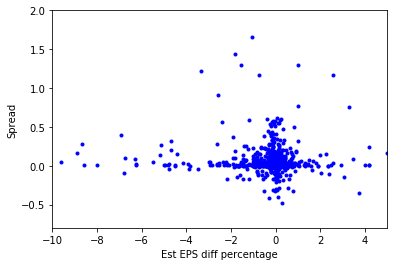

In [562]:
y_label = 'Spread'
plot(final_res, lags, 'Est EPS diff percentage', y_label, axis=[-10, 5, -0.8, 2])

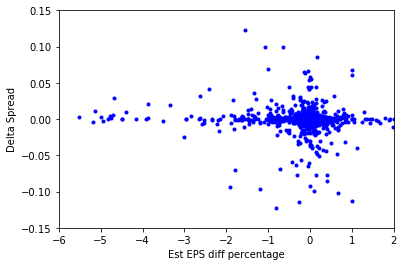

In [563]:
y_label = 'Delta Spread'
plot(final_res, lags, 'Est EPS diff percentage', y_label, axis=[-6, 2, -0.15, 0.15])

1088


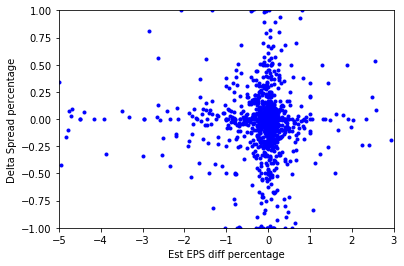

In [584]:
y_label = 'Delta Spread percentage'
print len(final_res)
plot(final_res, lags, 'Est EPS diff percentage', y_label, axis=[-5, 3, -1, 1])

686


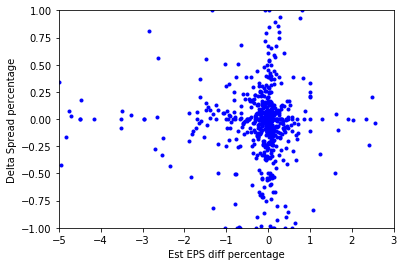

686


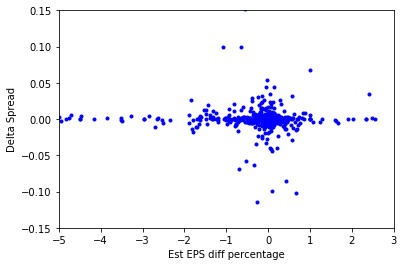

In [587]:
# combine earnings surprises in all quarters in same deal and see the impact on spread
x_label = 'Est EPS diff percentage'
y_label = 'Delta Spread percentage'
combined_final_res = final_res.groupby(['Action ID'])[x_label, y_label].mean()
print len(combined_final_res)
plot(combined_final_res, lags, x_label, y_label, axis=[-5, 3, -1, 1])

y_label = 'Delta Spread'
combined_final_res = final_res.groupby(['Action ID'])[x_label, y_label].mean()
plot(combined_final_res, lags, x_label, y_label, axis=[-5, 3, -0.15, 0.15])

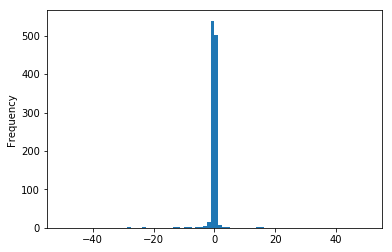

In [602]:
# earnings surprise distribution
final_res['Est EPS diff'].plot.hist(stacked=True, bins=80, range=(-50, 50))
plt.show()

# def display_hist(deals, industry=False, bin=100):
#     stat_list = []
#     return_label = 'Return Used'
#     print 'count: %s' % str(len(deals))
#     stat_dict = print_stat(deals, return_label)
#     stat_dict['Industry'] = 'All'
#     stat_list.append(stat_dict)
#     deals[return_label].plot.hist(stacked=True, bins=bin)
#     plt.show()

#### 462 deals have no earnings data for this analysis. The average deal period is about 77 days for these deals. Some of them actually has no EPS data pulled back from Bloomberg (e.g. 0256595Z SM, BHGE US)

In [633]:
print 'Deal count that has no earnings during the deal period: %s' % str(len(no_eps_list))
no_eps_df = pd.DataFrame(no_eps_list, columns=['Action ID'])
no_eps_df = no_eps_df.merge(ma_deals, on='Action ID', how='left')
avg_duration(no_eps_df[no_eps_df['Completion/Termination Date'] != ' '], 'No EPS')
no_eps_df[no_eps_df['Completion/Termination Date'] == ' ']

Deal count that has no earnings during the deal period: 288
Number of deals: 284. Average number of days spent on No EPS deals: 69.3063380282


,Action ID,Announce Date,Target Ticker,Target Name,Acquirer Ticker,Announced Total Value (mil.),Payment Type,Deal Status,Completion/Termination Date,Cash Terms,Target Industry Sector,Mean Price Return lag4,Mean t+1 - t,Mean t - t-1,Mean t+1 - t-1
96,153479333,12/8/2017,MLC LN,Millennium & Copthorne Hotels PLC,CIT SP,908.45,Cash,Pending,,6,"Consumer, Cyclical",NaN,NaN,NaN,NaN
157,156830757,12/7/2017,ENTL US,Entellus Medical Inc,SYK US,629.89,Cash,Pending,,24,"Consumer, Non-cyclical",NaN,NaN,NaN,NaN
196,148903660,12/4/2017,BGC US,General Cable Corp,PRY IM,2517.74,Cash,Pending,,30,Industrial,NaN,NaN,NaN,NaN
238,153198656,9/15/2017,826 HK,Tiangong International Co Ltd,1542639D HK,597.85,Cash,Pending,,0.9,Basic Materials,NaN,NaN,NaN,NaN


#### Of those 2819 earnings reaction day returns, 140 of them have NaN value. The remaining 2679 returns are used for the below analysis

In [634]:
print len(res)
print len(res[res['Return Used'].isnull()])

1121
0


#### Some stocks may not always have estimate EPS to compare with the actual. Analysis on comparing the EPS may not be accurate

In [635]:
nan_est_eps_actionid_list = []
for actionid, eps_df in actionid_eps_dict.items():
    null_len = len(eps_df[eps_df['Est EPS'].isnull()])
    if null_len:
#         print eps_df[eps_df['Est EPS'].isnull()]
        nan_est_eps_actionid_list.append(actionid)
            
print 'number of deals have NaN est. EPS: ' + str(len(nan_est_eps_actionid_list))

number of deals have NaN est. EPS: 221


#### Plot the xy plot to show relation between EPS and return

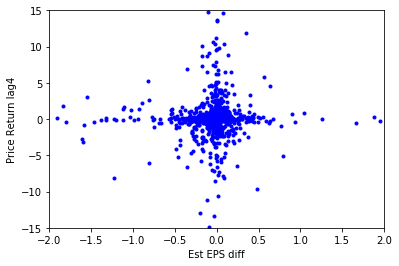

In [638]:
# After concatenate the eps df, exclude all the NaN rows, it could be missing Est EPS
# or missing Peer EPS. Then plot the data against the price returns 
def plot(res, lags, x1_label, y_label, marks='b.', axis=None):
        frames = res[res[x1_label].isnull() == False]
        frames = frames[frames[y_label].isnull() == False]
        est_diff_x = frames[x1_label]
        y = frames[y_label]
        plt.plot(est_diff_x, y, marks)
        plt.xlabel(x1_label)
        plt.ylabel(y_label)
        if axis:
            plt.axis(axis)
        plt.show()
        
        
y_label = 'Price Return lag4'
# y_label = 'Return Used'
plot(res, lags, 'Est EPS diff', y_label, axis=[-2, 2, -15, 15])

In [639]:
# print nasdaq_res['Est EPS diff'].mean()
# max_eps_diff = nasdaq_res[nasdaq_res['Est EPS diff'] == max(nasdaq_res[nasdaq_res['Est EPS diff'].notnull()]['Est EPS diff'])]
# print max_eps_diff
# print min(nasdaq_res[nasdaq_res['Est EPS diff'].notnull()]['Est EPS diff'])
# print nasdaq_res['Est EPS diff'].std()
print len(res[res['Est EPS diff'].abs() > 2])
test_res = res[res['Est EPS diff'].abs() < 2]
print test_res['Est EPS diff'].mean()
print test_res['Est EPS diff'].std()

36
-0.0383073732719
0.284376435597


In [640]:
res[res['Est EPS diff'].abs() > 5]

,Quarter,Date,Time,Unknown,EPS,Est EPS,Date F,Est EPS diff,Est EPS diff percentage,Price,...,Target Industry Sector,Cash Terms,Return Used,Spread,t+1 - t Price,t+1 - t Spread,t - t-1 Price,t - t-1 Spread,Delta Spread,Delta Spread percentage
3,2009:A,4/14/2010,NaN,7.9438,19.2100,3.717,2010-04-14,15.4930,4.168146,74.5000,...,"Consumer, Non-cyclical",75.0,0.675676,0.006711,74.50,0.006711,74.0000,0.013514,0.000000,0.000000
0,2015:Q4,3/16/2016,17:00,-0.2580,0.6400,6.825,2016-03-16,-6.1850,-0.906227,35.4800,...,"Consumer, Cyclical",35.8,-0.028185,0.009019,35.47,0.009304,35.5500,0.007032,0.000284,0.031541
0,2013:A,11/12/2013,Aft-mkt,2621.7245,2622.0000,2738.150,2013-11-12,-116.1500,-0.042419,27700.0000,...,"Consumer, Non-cyclical",28000.0,0.018051,0.010830,27705.00,0.010648,27735.0000,0.009555,-0.000182,-0.016844
4,2012:Q2,6/25/2012,9:00,115.1000,115.0600,100.785,2012-06-25,14.2750,0.141638,5950.0000,...,Financial,7000.0,0.847458,0.176471,5900.00,0.186441,5900.0000,0.186441,-0.009970,-0.053476
5,2012:Q1,4/17/2012,19:11,93.9200,93.9200,99.300,2012-04-17,-5.3800,-0.054179,6250.0000,...,Financial,7000.0,0.000000,0.120000,6250.00,0.120000,6300.0000,0.111111,0.000000,0.000000
0,2013:A,2/5/2014,NaN,-5.0600,-7.6670,0.467,2014-02-05,-8.1340,-17.417559,359.9000,...,"Consumer, Non-cyclical",362.0,0.055586,0.005835,360.00,0.005556,359.8000,0.006115,-0.000279,-0.047884
0,2011:A,5/17/2011,16:00,4.6595,3.0000,12.450,2011-05-17,-9.4500,-0.759036,144.0000,...,Financial,146.0,0.694444,0.013889,145.00,0.006897,144.0000,0.013889,-0.006992,-0.503448
0,2010:A,5/14/2010,15:00,-153.0942,-139.8600,-111.867,2010-05-14,-27.9930,-0.250235,159.0000,...,Financial,154.0,-0.625000,-0.031447,160.00,-0.037500,160.0000,-0.037500,0.006053,-0.161426
0,2017:Q1,7/29/2016,15:00,-16.8788,-17.2800,6.030,2016-07-29,-23.3100,-3.865672,92.0000,...,"Consumer, Cyclical",88.0,-2.127660,-0.043478,90.00,-0.022222,94.0000,-0.063830,0.020352,-0.318841
1,2016:A,5/12/2016,15:00,-139.1498,-154.6400,-735.107,2016-05-12,580.4670,0.789636,130.0000,...,"Consumer, Cyclical",88.0,-0.763359,-0.323077,133.00,-0.338346,131.0000,-0.328244,0.005167,-0.015742


In [641]:
print res[['Est EPS diff', 'Return Used']].corr(method='spearman')
for lag in lags:
    print res[['Est EPS diff', 'Price Return lag' + str(lag)]].corr(method='spearman')

              Est EPS diff  Return Used
Est EPS diff      1.000000     0.129765
Return Used       0.129765     1.000000
                   Est EPS diff  Price Return lag4
Est EPS diff           1.000000           0.065041
Price Return lag4      0.065041           1.000000


In [642]:
def earnings_surprise_count(res):
    null_eps_count = len(res[res['Est EPS diff'].isnull()])
    all_eps_count = len(res)
    available_eps_res = res[res['Est EPS diff'].notnull()]
    available_eps_count = len(available_eps_res)
    pos_eps_diff_count = len(available_eps_res[available_eps_res['Est EPS diff'] > 0])
    neg_eps_diff_count = len(available_eps_res[available_eps_res['Est EPS diff'] <= 0])
    print 'All EPS report count: ' + str(all_eps_count)
    print 'NaN EPS report count: ' + str(null_eps_count)
    print 'Available EPS count: ' + str(available_eps_count)
    print 'Positive EPS surprise count: %d (%f%%)' % (pos_eps_diff_count, pos_eps_diff_count/available_eps_count*100)
    print 'Negative EPS surprise count: %d (%f%%)' % (neg_eps_diff_count, neg_eps_diff_count/available_eps_count*100)
  
earnings_surprise_count(res)

All EPS report count: 1121
NaN EPS report count: 0
Available EPS count: 1121
Positive EPS surprise count: 523 (46.654773%)
Negative EPS surprise count: 598 (53.345227%)


#### some cases have no EPS data pulled out and some cases have only one earning report between the announcement date and completion/termination date and therefore, there is only average price return (which is the only return after the only earning report releases) and no volatilities.

In [643]:
# Sector
ma_deals['Target Industry Sector'].unique()

array(['Consumer, Cyclical', 'Consumer, Non-cyclical', 'Communications',
       'Basic Materials', 'Financial', 'Technology', 'Industrial',
       'Energy', 'Utilities', 'Diversified'], dtype=object)

In [644]:
def print_stat(df, lag):
    stat_dict = dict()
    print str(lag) + ' return'
#       mean = 'Mean Price Return lag' + str(lag)
    mean = 'Return Used'
    r_mean = df[mean]
    stat_dict['min_retun'] = min(r_mean[r_mean.isnull() == False])
    stat_dict['max_return'] = max(r_mean[r_mean.isnull() == False])
    stat_dict['mean_return'] = r_mean.mean()
    stat_dict['std_return'] = r_mean.std()
    stat_dict['avg_abs_return'] = r_mean.abs().mean()
    print 'Max: %s, Min: %s' % (stat_dict['max_return'], stat_dict['min_retun'])
    print 'Mean: %s, Std: %s' % (stat_dict['mean_return'], stat_dict['std_return'])
    print 'Avg Absolute Return %s' % (stat_dict['avg_abs_return'])
    return stat_dict
        
def display_hist(deals, industry=False, bin=100):
    stat_list = []
    return_label = 'Return Used'
    print 'count: %s' % str(len(deals))
    stat_dict = print_stat(deals, return_label)
    stat_dict['Industry'] = 'All'
    stat_list.append(stat_dict)
    deals[return_label].plot.hist(stacked=True, bins=bin)
    plt.show()
    
    if industry:
        for industry in deals['Target Industry Sector'].unique():
            sub_deals = deals[deals['Target Industry Sector'] == industry]
            stat_dict = print_stat(sub_deals, return_label)
            stat_dict['Industry'] = industry
            print '%s count: %s' % (industry, str(len(sub_deals)))
            sub_deals[return_label].plot.hist(stacked=True, bins=bin)
            plt.show()
            stat_list.append(stat_dict)
    df = pd.DataFrame(stat_list)
#     print df
    return df

In [24]:
# actionid = 134117432
# ma_deals[ma_deals['Action ID'] == actionid]
# actionid_eps_dict[actionid]
# df = ticker_price_dict['NXPI US']
# print df[df['Date'] == '10/25/2017']
# print df[df['Date'] == '8/2/2017']
# print df[df['Date'] == '5/3/2017']
# print df[df['Date'] == '2/1/2017']
# res.to_csv('ma_res.csv', index=False)

count: 1121
Return Used return
Max: 46.5460526316, Min: -14.5157470992
Mean: 0.0649714273652, Std: 2.18160148181
Avg Absolute Return 0.822496178204


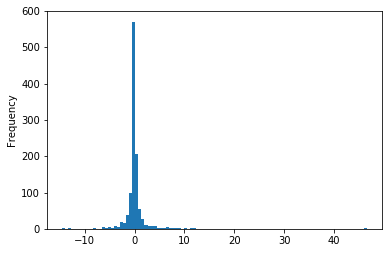

Return Used return
Max: 8.74635568513, Min: -14.5157470992
Mean: -0.0755651948699, Std: 1.87996230999
Avg Absolute Return 0.847890523229
Consumer, Non-cyclical count: 247


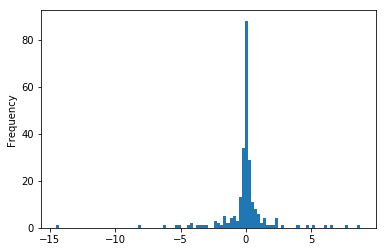

Return Used return
Max: 8.42719227675, Min: -2.4254473161
Mean: 0.139306134756, Std: 1.37633497084
Avg Absolute Return 0.692504896312
Communications count: 124


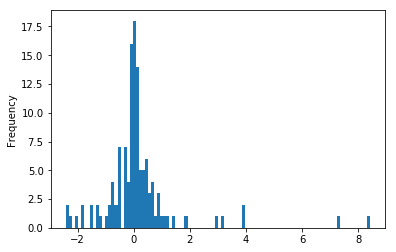

Return Used return
Max: 4.87804878049, Min: -3.87876884422
Mean: 0.201333059401, Std: 1.4841845191
Avg Absolute Return 0.865214679389
Basic Materials count: 70


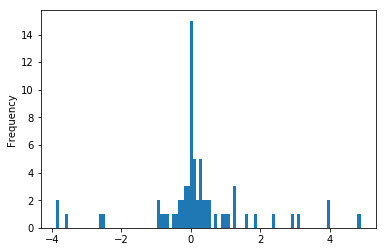

Return Used return
Max: 11.3303269448, Min: -5.05344995141
Mean: 0.332664389657, Std: 1.89981822187
Avg Absolute Return 0.852725817846
Financial count: 122


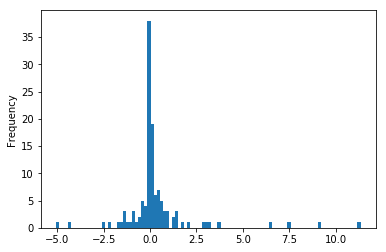

Return Used return
Max: 9.92287917738, Min: -13.0181818182
Mean: -0.161440496337, Std: 2.02126951547
Avg Absolute Return 0.908638538263
Consumer, Cyclical count: 153


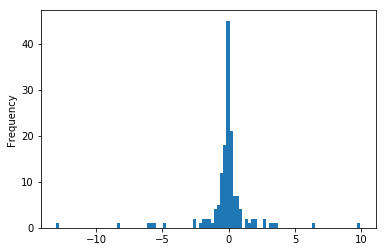

Return Used return
Max: 5.86734693878, Min: -6.25682066206
Mean: -0.00139171550154, Std: 1.41905632805
Avg Absolute Return 0.78082254118
Technology count: 156


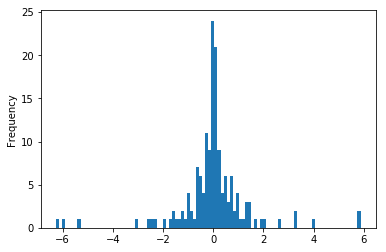

Return Used return
Max: 46.5460526316, Min: -4.19161676647
Mean: 0.365910795199, Std: 4.37310466712
Avg Absolute Return 0.9962723643
Industrial count: 131


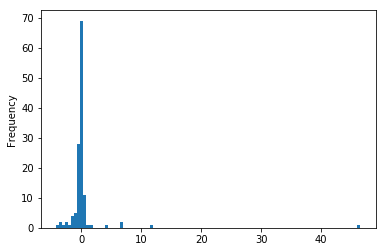

Return Used return
Max: 6.875, Min: -6.10169491525
Mean: -0.0839408041896, Std: 1.69856068062
Avg Absolute Return 0.890462093548
Energy count: 57


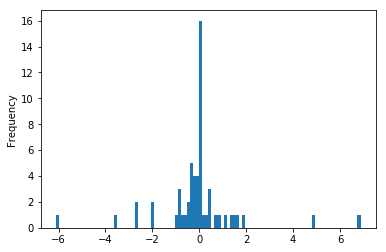

Return Used return
Max: 2.39043824701, Min: -2.50896057348
Mean: 0.0218843004783, Std: 0.598934265773
Avg Absolute Return 0.333717336974
Utilities count: 60


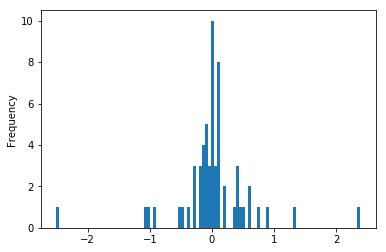

Return Used return
Max: 0.0, Min: 0.0
Mean: 0.0, Std: nan
Avg Absolute Return 0.0
Diversified count: 1


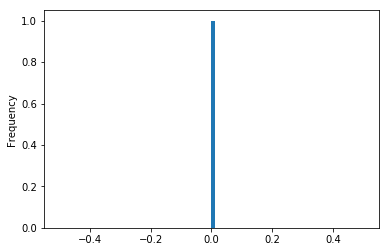

In [645]:
res_df = display_hist(res, industry=True)

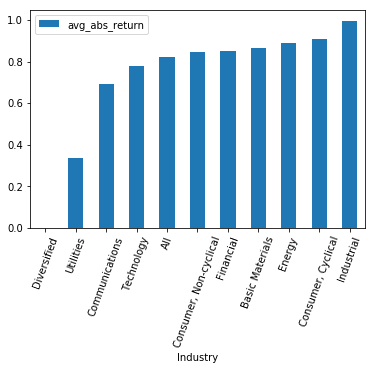

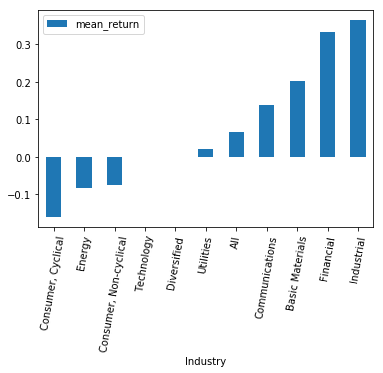

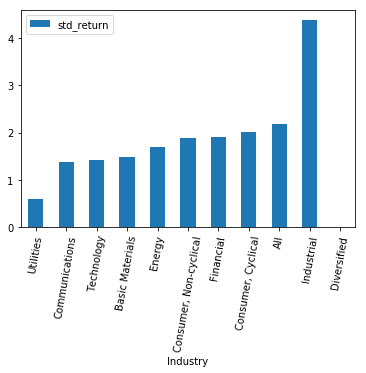

,Industry,avg_abs_return,max_return,mean_return,min_retun,std_return
0,All,0.822496,46.546053,0.064971,-14.515747,2.181601
1,"Consumer, Non-cyclical",0.847891,8.746356,-0.075565,-14.515747,1.879962
2,Communications,0.692505,8.427192,0.139306,-2.425447,1.376335
3,Basic Materials,0.865215,4.878049,0.201333,-3.878769,1.484185
4,Financial,0.852726,11.330327,0.332664,-5.053450,1.899818
5,"Consumer, Cyclical",0.908639,9.922879,-0.161440,-13.018182,2.021270
6,Technology,0.780823,5.867347,-0.001392,-6.256821,1.419056
7,Industrial,0.996272,46.546053,0.365911,-4.191617,4.373105
8,Energy,0.890462,6.875000,-0.083941,-6.101695,1.698561
9,Utilities,0.333717,2.390438,0.021884,-2.508961,0.598934


In [646]:
res_df.sort_values('avg_abs_return').plot(x='Industry', y='avg_abs_return', kind='bar', rot =70)
plt.show()

res_df.sort_values('mean_return').plot(x='Industry', y='mean_return', kind='bar', rot =80)
plt.show()

res_df.sort_values('std_return').plot(x='Industry', y='std_return', kind='bar', rot =80)
plt.show()

res_df

# NASDAQ

In [648]:
def write_BHD_price_csv(filename, tickers):
    with open(filename, 'wb') as csvfile:
        writer = csv.writer(csvfile, quoting=csv.QUOTE_NONE, escapechar ='\\')
        str_ann_date = '1/1/2010'
        str_end_date = '12/12/2017'
        ann_date = datetime.strptime(str_ann_date, '%m/%d/%Y')
        end_date = datetime.strptime(str_end_date, '%m/%d/%Y')
        num_of_date = (end_date - ann_date).days + 1
        for ticker in tickers.dropna():
            writer.writerow([ticker])
            writer.writerow([r'=BDH("%s Equity","Px_Last","%s","%s")' % (ticker, str_ann_date, str_end_date)])
            for i in range(2075): # num_of_date between 1/1/2010 and 12/12/2017 is 2073
                writer.writerow('')

    with open(filename, 'rb') as f:
        data = f.read()
    with open(filename, 'wb') as g:
        g.write(data.replace('\\"', '\"').replace('Equity\"\\', 'Equity\"').replace('\"\\', '\"'))

In [649]:
nasdaq_companylist = pd.read_csv(base_dir + 'nasdaq_companylist.csv', header=0)
nasdaq_companylist['Symbol'] = nasdaq_companylist['Symbol'] + ' US'
write_BDS_csv(base_dir + 'nasdaq_eps_hist.csv', nasdaq_companylist['Symbol'])
nasdaq_eps_pull_df = load_df(base_dir + 'nasdaq_eps_pull.csv', 
                                 ['Quarter', 'Date', 'Time', 'Unknown', 'EPS', 'Est EPS'],
                                format_date=True)
cal_eps_diff(nasdaq_eps_pull_df)
nasdaq_eps_dict = load_ticker_dict(nasdaq_eps_pull_df, 'Date', 'Quarter')
write_BHD_price_csv(base_dir + 'nasdaq_BHD_price.csv', nasdaq_companylist['Symbol'])

In [650]:
nasdaq_price_pull = load_df(base_dir + 'nasdaq_BHD_price_pull.csv', ['Date', 'Price'])
for lag in lags:
    add_price_lag(nasdaq_price_pull, lag)
nasdaq_ticker_price_dict = load_ticker_dict(nasdaq_price_pull, 'Price', 'Date')
nasdaq_ticker_price_dict = remove_last_n_rows(nasdaq_ticker_price_dict, lag, forward)
nasdaq_ticker_price_dict['PIH US']

,Date,Price,Price Return lag4,t+1 - t,t - t-1,t+1 - t-1
1,3/31/2014,8.0000,NaN,-0.625000,NaN,NaN
2,4/1/2014,7.9500,8.625000,2.641509,-0.625000,2.000000
3,4/2/2014,8.1600,12.452830,2.818627,2.641509,5.534591
4,4/3/2014,8.3900,9.068627,3.575685,2.818627,6.495098
5,4/4/2014,8.6900,5.959476,2.876870,3.575685,6.555423
6,4/7/2014,8.9400,1.611047,-0.447427,2.876870,2.416571
7,4/8/2014,8.9000,-0.559284,-0.112360,-0.447427,-0.559284
8,4/9/2014,8.8900,7.303371,-0.674916,-0.112360,-0.786517
9,4/10/2014,8.8300,6.749156,0.679502,-0.674916,0.000000
10,4/11/2014,8.8900,4.643262,7.424072,0.679502,8.154020


In [651]:
nasdaq_tickers = nasdaq_companylist['Symbol']
nasdaq_tickers_df = nasdaq_tickers.to_frame()

for index, row in nasdaq_tickers_df.iterrows():
    ticker = row['Symbol']
    eps_df =  nasdaq_eps_dict[ticker]
    df = eps_df.merge(nasdaq_ticker_price_dict[ticker], on='Date', how='left')
    col_name = 'Price Return lag' + str(lag)
    nasdaq_tickers_df.loc[index, 'Mean ' + col_name] = df[col_name].mean()

nasdaq_tickers_df['Sector'] = nasdaq_companylist['Sector']
nasdaq_tickers_df

,Symbol,Mean Price Return lag4,Sector
0,PIH US,3.620335,Finance
1,TURN US,0.133213,Finance
2,FLWS US,-1.782823,Consumer Services
3,FCCY US,0.817226,Finance
4,SRCE US,1.606735,Finance
5,VNET US,-4.149570,Technology
6,TWOU US,3.864128,Technology
7,JOBS US,-0.132021,Technology
8,CAFD US,3.628032,Public Utilities
9,EGHT US,1.184580,Public Utilities


In [652]:
def exchange_eps_price_return_concat(deals, eps_dict, ticker_price_dict):
    concat_eps_return_list = []
    for index, row in deals.iterrows():
        ticker = row['Symbol']
        eps_df =  eps_dict[ticker]
        df = eps_df.merge(ticker_price_dict[ticker], on='Date', how='left')
        df['Symbol'] = ticker
        df['Target Industry Sector'] = row['Sector']
        if len(df):
            df['Return Used'] = [row[choose_return(row['Time'])] for index, row in df.iterrows()]
            concat_eps_return_list.append(df)
    return pd.concat(concat_eps_return_list)


nasdaq_res = exchange_eps_price_return_concat(nasdaq_tickers_df, nasdaq_eps_dict, nasdaq_ticker_price_dict)

#### 123515 returns linked to earnings reaction day in NASDAQ and 61159 have NaN. Most of them because the dates are outside our sample, only 4335 of them are NaN and after 2010

In [653]:
print len(nasdaq_res)
print len(nasdaq_res[nasdaq_res['Return Used'].isnull()])
nan_return_df = nasdaq_res[nasdaq_res['Return Used'].isnull()]
nan_return_df[nan_return_df['Date F'] > datetime.strptime('1/1/2010', '%m/%d/%Y')]

123515
61155


,Quarter,Date,Time,Unknown,EPS,Est EPS,Date F,Est EPS diff,Est EPS diff percentage,Price,Price Return lag4,t+1 - t,t - t-1,t+1 - t-1,Symbol,Target Industry Sector,Return Used
22,2012:Q1,5/7/2012,9:15,0.2300,0.2300,0.200,2012-05-07,0.03,0.15,NaN,NaN,NaN,NaN,NaN,FCCY US,Finance,NaN
27,2010:Q4,1/27/2011,9:14,0.0900,0.1800,0.200,2011-01-27,-0.02,-0.10,NaN,NaN,NaN,NaN,NaN,FCCY US,Finance,NaN
1,2017:Q2,8/14/2017,16:42,-0.2100,-0.2100,NaN,2017-08-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ABEOW US,Health Care,NaN
3,2016:Q4,4/10/2017,NaN,-0.1681,-0.1900,NaN,2017-04-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ABEOW US,Health Care,NaN
8,2015:Q3,11/16/2015,NaN,-0.1900,-0.1900,NaN,2015-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ABEOW US,Health Care,NaN
11,2014:Q4,3/31/2015,NaN,-6.4990,NaN,NaN,2015-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ABEOW US,Health Care,NaN
12,2013:Q1,5/16/2013,NaN,0.1300,NaN,NaN,2013-05-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ABEOW US,Health Care,NaN
13,2012:Q4,3/20/2013,6:01,0.7900,NaN,NaN,2013-03-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ABEOW US,Health Care,NaN
14,2012:Q3,11/14/2012,NaN,-0.6300,NaN,NaN,2012-11-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ABEOW US,Health Care,NaN
15,2012:Q2,8/14/2012,NaN,-0.4600,NaN,NaN,2012-08-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ABEOW US,Health Care,NaN


In [654]:
earnings_surprise_count(nasdaq_res)

All EPS report count: 123515
NaN EPS report count: 49059
Available EPS count: 74456
Positive EPS surprise count: 47865 (64.286290%)
Negative EPS surprise count: 26591 (35.713710%)


In [664]:
temp_res = nasdaq_res[nasdaq_res['Est EPS diff percentage'].notnull()]
temp_res = temp_res[temp_res['Price'].notnull()]
temp_res.to_csv('temp_nasdaq.csv', index=False)
print len(temp_res)
print len(nasdaq_res)

45587
123515


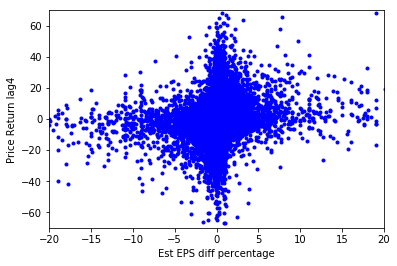

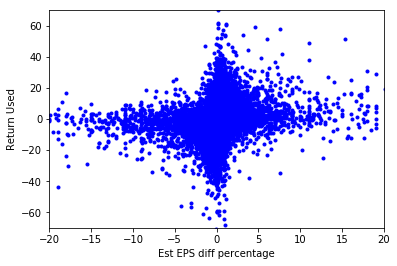

In [696]:
y_label = 'Price Return lag4'
# y_label = 'Return Used'
plot(temp_res, lags, 'Est EPS diff percentage', y_label, axis=[-20, 20, -70, 70])
plot(temp_res, lags, 'Est EPS diff percentage', 'Return Used', axis=[-20, 20, -70, 70])

In [106]:
nasdaq_res

,Quarter,Date,Time,Unknown,EPS,Est EPS,Date F,Est EPS diff,Est EPS diff percentage,Price,Price Return lag2,t+1 - t,t - t-1,t+1 - t-1,Price Return lag3,Price Return lag4,Symbol,Target Industry Sector,Return Used
0,2017:Q3,11/13/2017,16:01,-0.3800,NaN,NaN,2017-11-13,NaN,NaN,7.1329,1.428571,-0.461243,1.898571,1.428571,1.428571,3.060000,PIH US,Finance,-0.461243
1,2017:Q2,8/10/2017,16:05,0.1500,NaN,NaN,2017-08-10,NaN,NaN,6.9500,0.609324,2.158273,-1.516225,0.609324,1.317840,8.403004,PIH US,Finance,2.158273
2,2017:Q1,5/11/2017,10:56,0.0400,NaN,NaN,2017-05-11,NaN,NaN,7.1500,2.797203,2.797203,0.000000,2.797203,6.293706,2.097902,PIH US,Finance,0.000000
3,2016:Q4,3/16/2017,16:05,0.2700,NaN,NaN,2017-03-16,NaN,NaN,7.2500,7.638889,6.896552,0.694444,7.638889,5.555556,6.409722,PIH US,Finance,6.896552
4,2016:Q3,11/14/2016,16:05,-0.3000,NaN,NaN,2016-11-14,NaN,NaN,7.2000,-3.955709,-2.779167,-1.210175,-3.955709,-2.582256,2.220027,PIH US,Finance,-2.779167
5,2016:Q2,8/11/2016,16:05,0.2200,NaN,NaN,2016-08-11,NaN,NaN,6.4680,4.913978,5.595238,-0.645161,4.913978,5.683564,3.686636,PIH US,Finance,5.595238
6,2016:Q1,5/12/2016,16:05,-0.1800,NaN,NaN,2016-05-12,NaN,NaN,5.8300,7.584483,7.030875,0.517241,7.584483,7.931034,12.241379,PIH US,Finance,7.030875
7,2015:Q4,3/17/2016,16:05,0.0900,NaN,NaN,2016-03-17,NaN,NaN,5.4000,-0.891266,2.962963,-3.743316,-0.891266,1.604278,4.991087,PIH US,Finance,2.962963
8,2015:Q3,11/12/2015,16:49,-0.0200,NaN,NaN,2015-11-12,NaN,NaN,7.1700,5.218618,4.044630,1.128350,5.218618,6.770099,6.911142,PIH US,Finance,4.044630
9,2015:Q2,8/13/2015,16:05,-0.0200,NaN,NaN,2015-08-13,NaN,NaN,7.7900,-2.053915,-2.053915,0.000000,-2.053915,-1.155327,-5.006418,PIH US,Finance,-2.053915


In [138]:
# print nasdaq_res['Est EPS diff'].mean()
# max_eps_diff = nasdaq_res[nasdaq_res['Est EPS diff'] == max(nasdaq_res[nasdaq_res['Est EPS diff'].notnull()]['Est EPS diff'])]
# print max_eps_diff
# print min(nasdaq_res[nasdaq_res['Est EPS diff'].notnull()]['Est EPS diff'])
# print nasdaq_res['Est EPS diff'].std()
print len(nasdaq_res[nasdaq_res['Est EPS diff'].abs() > 2])
test_res = nasdaq_res[nasdaq_res['Est EPS diff'].abs() < 2]
print test_res['Est EPS diff'].mean()
print test_res['Est EPS diff'].std()

2621
0.053949167502
0.292592044295


In [135]:
print nasdaq_res[['Est EPS diff', 'Return Used']].corr(method='spearman')
for lag in lags:
    print nasdaq_res[['Est EPS diff', 'Price Return lag' + str(lag)]].corr(method='spearman')

              Est EPS diff  Return Used
Est EPS diff      1.000000     0.271959
Return Used       0.271959     1.000000
                   Est EPS diff  Price Return lag2
Est EPS diff           1.000000           0.266058
Price Return lag2      0.266058           1.000000
                   Est EPS diff  Price Return lag3
Est EPS diff           1.000000           0.250397
Price Return lag3      0.250397           1.000000
                   Est EPS diff  Price Return lag4
Est EPS diff           1.000000           0.239458
Price Return lag4      0.239458           1.000000


count: 123515
Return Used return
Max: 8354.54545455, Min: -75.2631578947
Mean: 0.244547317678, Std: 35.5802828384
Avg Absolute Return 5.69396736865


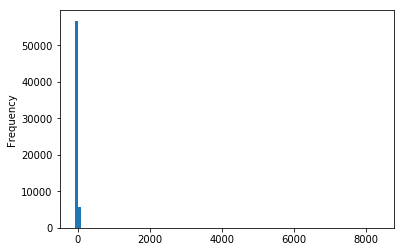

Return Used return
Max: 162.411347518, Min: -75.2631578947
Mean: 0.453139620952, Std: 5.43423469645
Avg Absolute Return 3.03240740305
Finance count: 25729


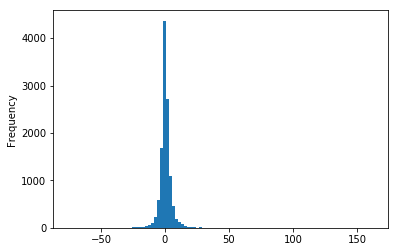

Return Used return
Max: 723.170731707, Min: -53.8461538462
Mean: 0.156476587299, Std: 12.177267331
Avg Absolute Return 5.69937408343
Consumer Services count: 14519


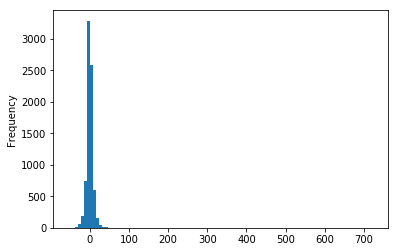

Return Used return
Max: 449.822064057, Min: -70.8333333333
Mean: 0.0394292960758, Std: 10.566070153
Avg Absolute Return 6.76786009799
Technology count: 22133


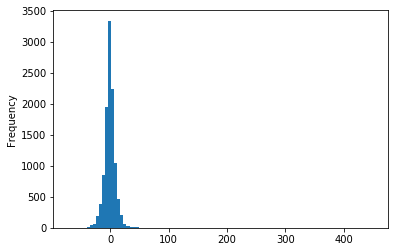

Return Used return
Max: 83.7398373984, Min: -70.0
Mean: -0.353694272558, Std: 8.84875494819
Avg Absolute Return 5.38377637908
Public Utilities count: 3005


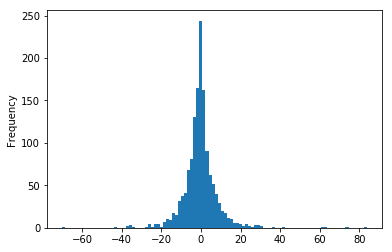

Return Used return
Max: 145.547073791, Min: -64.0287769784
Mean: 0.346209989857, Std: 9.7148970206
Avg Absolute Return 6.40043039939
Capital Goods count: 9590


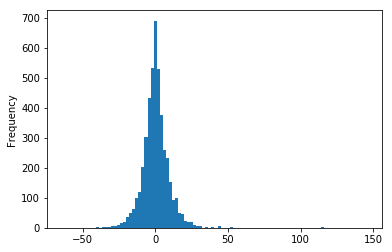

Return Used return
Max: 264.946536495, Min: -45.2991452991
Mean: -0.167022752721, Std: 11.1456223785
Avg Absolute Return 6.21995997069
Basic Industries count: 3838


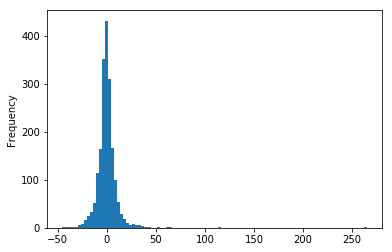

Return Used return
Max: 8354.54545455, Min: -65.0
Mean: 0.368286307241, Std: 75.169893071
Avg Absolute Return 6.6001372612
Health Care count: 23024


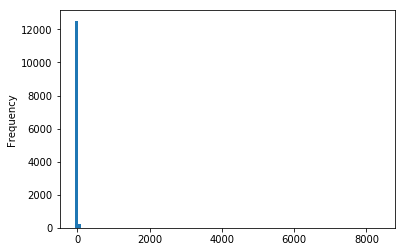

Return Used return
Max: 342.934782609, Min: -38.446969697
Mean: -0.00549662009999, Std: 12.5681086703
Avg Absolute Return 5.36020897585
Energy count: 2615


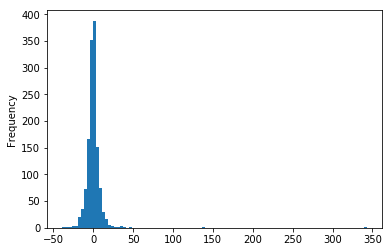

Return Used return
Max: 627.272727273, Min: -70.6060606061
Mean: 0.592784473893, Std: 21.404540326
Avg Absolute Return 7.59088800061
Miscellaneous count: 4191


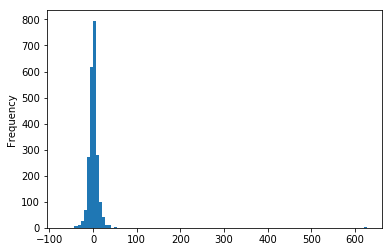

Return Used return
Max: 1063.93442623, Min: -68.5069984448
Mean: 1.17878772035, Std: 32.4704702999
Avg Absolute Return 6.61906932323
Transportation count: 2796


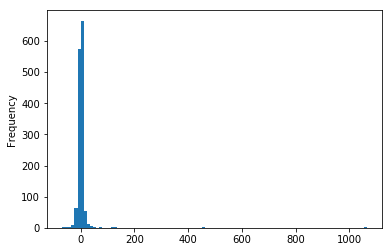

Return Used return
Max: 48.4536082474, Min: -33.829787234
Mean: -0.333984897312, Std: 5.37468658566
Avg Absolute Return 3.13028188673
n/a count: 1733


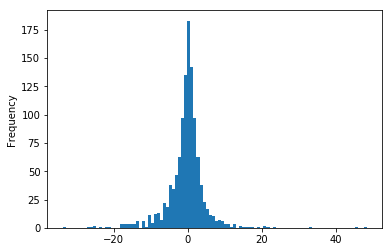

Return Used return
Max: 161.297264064, Min: -61.2903225806
Mean: 0.0522241338555, Std: 9.42078759079
Avg Absolute Return 5.85368411342
Consumer Non-Durables count: 5975


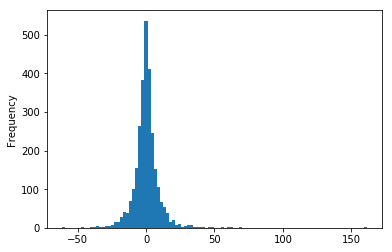

Return Used return
Max: 81.4159292035, Min: -47.8260869565
Mean: -0.00302956828359, Std: 10.2125027079
Avg Absolute Return 6.72845983465
Consumer Durables count: 4367


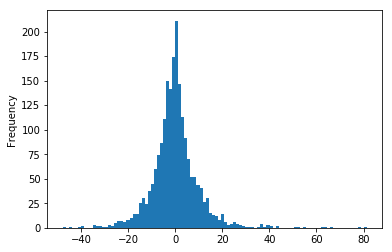

In [35]:
nasdaq_res_df = display_hist(nasdaq_res, industry=True)

In [ ]:
for industry in ma_deals['Target Industry Sector'].unique():
    actionids = ma_deals[ma_deals['Target Industry Sector'] == industry]['Action ID']
    print industry
    axis = [-2, 2, -5, 5]
    draw_relationship(actionids, ma_deals, actionid_eps_dict, ticker_price_dict, axis=axis)
    print

In [69]:
for industry in nasdaq_res['Target Industry Sector'].unique():
    subset_deals = nasdaq_res[nasdaq_res['Target Industry Sector'] == industry]
    print industry + ',' + str(subset_deals[['Est EPS diff', 'Return Used']].corr(method='spearman')['Return Used'][0])

Finance,0.348193261365
Consumer Services,0.298804501922
Technology,0.264140968575
Public Utilities,0.221316966787
Capital Goods,0.40695113696
Basic Industries,0.311853053921
Health Care,0.170750309862
Energy,0.189915400083
Miscellaneous,0.278165327395
Transportation,0.261078355491
n/a,0.202246348927
Consumer Non-Durables,0.407606550176
Consumer Durables,0.389989402877


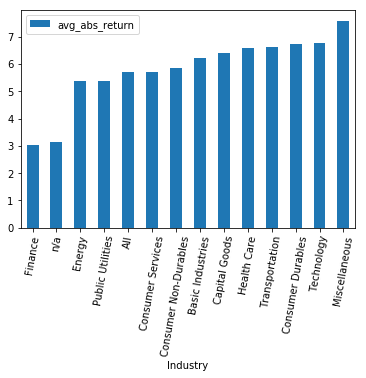

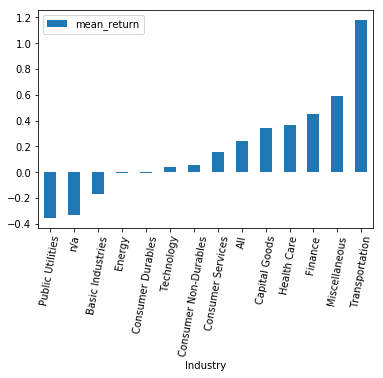

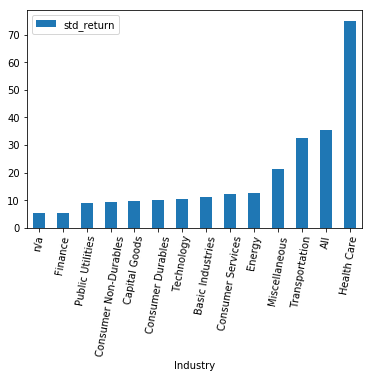

,Industry,avg_abs_return,max_return,mean_return,min_retun,std_return
0,All,5.693967,8354.545455,0.244547,-75.263158,35.580283
1,Finance,3.032407,162.411348,0.453140,-75.263158,5.434235
2,Consumer Services,5.699374,723.170732,0.156477,-53.846154,12.177267
3,Technology,6.767860,449.822064,0.039429,-70.833333,10.566070
4,Public Utilities,5.383776,83.739837,-0.353694,-70.000000,8.848755
5,Capital Goods,6.400430,145.547074,0.346210,-64.028777,9.714897
6,Basic Industries,6.219960,264.946536,-0.167023,-45.299145,11.145622
7,Health Care,6.600137,8354.545455,0.368286,-65.000000,75.169893
8,Energy,5.360209,342.934783,-0.005497,-38.446970,12.568109
9,Miscellaneous,7.590888,627.272727,0.592784,-70.606061,21.404540


In [36]:
nasdaq_res_df.sort_values('avg_abs_return').plot(x='Industry', y='avg_abs_return', kind='bar', rot =80)
plt.show()

nasdaq_res_df.sort_values('mean_return').plot(x='Industry', y='mean_return', kind='bar', rot =80)
plt.show()

nasdaq_res_df.sort_values('std_return').plot(x='Industry', y='std_return', kind='bar', rot =80)
plt.show()

nasdaq_res_df

# SP500

In [676]:
sp500_companylist = pd.read_csv(base_dir + 'sp500_companylist.csv', header=0)
sp500_companylist['Symbol'] = sp500_companylist['Symbol'] + ' US'
write_BDS_csv(base_dir + 'sp500_eps_hist.csv', sp500_companylist['Symbol'])

In [720]:
sp500_eps_pull_df = load_df(base_dir + 'sp500_eps_pull.csv', 
                                 ['Quarter', 'Date', 'Time', 'Unknown', 'EPS', 'Est EPS'],
                                format_date=True)
cal_eps_diff(sp500_eps_pull_df)
sp500_eps_dict = load_ticker_dict(sp500_eps_pull_df, 'Date', 'Quarter')
write_BHD_price_csv(base_dir + 'sp500_BHD_price.csv', sp500_companylist['Symbol'])

In [721]:
def add_vol(price_df, day=10):
    price_df['vol'] = price_df['t - t-1'].rolling(window=10,center=False).std()
    return price_df

sp500_price_pull = load_df(base_dir + 'sp500_BHD_price_pull.csv', ['Date', 'Price'])

lags = range(2,5)
for lag in lags:
    add_price_lag(sp500_price_pull, lag)
#     add_price_lag(amex_price_pull, lag, forward=forward)
sp500_price_pull = add_vol(sp500_price_pull)
sp500_ticker_price_dict = load_ticker_dict(sp500_price_pull, 'Price', 'Date')
sp500_ticker_price_dict = remove_last_n_rows(sp500_ticker_price_dict, lag, forward)

In [722]:
sp500_price_pull

,Date,Price,Price Return lag2,t+1 - t,t - t-1,t+1 - t-1,Price Return lag3,Price Return lag4,vol
0,MMM US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/4/2010,83.02,NaN,-0.626355,NaN,NaN,NaN,NaN,NaN
2,1/5/2010,82.50,0.782944,1.418182,-0.626355,0.782944,0.855216,1.565888,NaN
3,1/6/2010,83.67,1.490909,0.071710,1.418182,1.490909,2.206061,1.793939,NaN
4,1/7/2010,83.73,0.776861,0.704646,0.071710,0.776861,0.370503,0.454165,NaN
5,1/8/2010,84.32,0.298579,-0.403226,0.704646,0.298579,0.382181,0.059716,NaN
6,1/11/2010,83.98,-0.320209,0.083353,-0.403226,-0.320209,-0.640417,-0.972486,NaN
7,1/12/2010,84.05,-0.238152,-0.321237,0.083353,-0.238152,-0.571565,-0.726363,NaN
8,1/13/2010,83.78,-0.654372,-0.334209,-0.321237,-0.654372,-0.809042,1.273052,NaN
9,1/14/2010,83.50,-0.489377,-0.155689,-0.334209,-0.489377,1.599427,1.121986,NaN


In [723]:
df = sp500_ticker_price_dict['MMM US']
df
# df[df['Date'] == '10/24/2017']
df.to_csv('test.csv', index=False)

In [724]:
sp500_tickers = sp500_companylist['Symbol']
sp500_tickers_df = sp500_tickers.to_frame()

for index, row in sp500_tickers_df.iterrows():
    ticker = row['Symbol']
    eps_df =  sp500_eps_dict[ticker]
    df = eps_df.merge(sp500_ticker_price_dict[ticker], on='Date', how='left')
    col_name = 'Price Return lag' + str(lag)
    sp500_tickers_df.loc[index, 'Mean ' + col_name] = df[col_name].mean()

sp500_tickers_df['Sector'] = sp500_companylist['Sector']
sp500_tickers_df

,Symbol,Mean Price Return lag4,Sector
0,MMM US,-0.011221,Industrials
1,ABT US,0.125807,Health Care
2,ABBV US,1.574690,Health Care
3,ACN US,0.889082,Information Technology
4,ATVI US,1.925177,Information Technology
5,AYI US,2.429834,Industrials
6,ADBE US,1.017833,Information Technology
7,AMD US,-1.154373,Information Technology
8,AAP US,0.351356,Consumer Discretionary
9,AES US,-0.423173,Utilities


In [725]:
sp500_res = exchange_eps_price_return_concat(sp500_tickers_df, sp500_eps_dict, sp500_ticker_price_dict)
earnings_surprise_count(sp500_res)

All EPS report count: 36133
NaN EPS report count: 3753
Available EPS count: 32380
Positive EPS surprise count: 24670 (76.189006%)
Negative EPS surprise count: 7710 (23.810994%)


In [727]:
temp_sp500_res = sp500_res[sp500_res['Est EPS diff percentage'].notnull()]
temp_sp500_res = temp_sp500_res[temp_sp500_res['Price'].notnull()]
temp_sp500_res = temp_sp500_res[temp_sp500_res['vol'].notnull()]
# len(temp_sp500_res[temp_sp500_res['Return Used'].isnull()])
temp_sp500_res.to_csv('temp_sp500_res.csv', index=False)

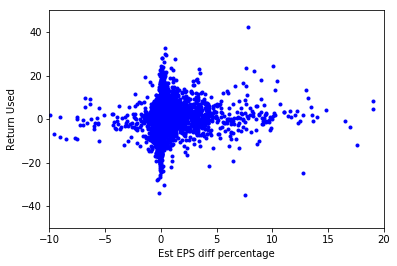

                         Est EPS diff percentage  Return Used
Est EPS diff percentage                  1.00000      0.28025
Return Used                              0.28025      1.00000


In [741]:
x_label = 'Est EPS diff percentage'
# y_label = 'Price Return lag4'
y_label = 'Return Used'
axis = [-10, 20, -50, 50]
plot(temp_sp500_res, lags, x_label, y_label, axis=axis)
print temp_sp500_res[[x_label, y_label]].corr(method='spearman')

Avg SP500 10-day vol on EPS date: 1.661623


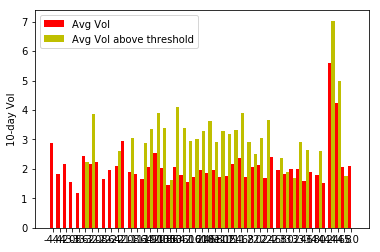

In [797]:
import numpy as np
import math

def autolabel(rects, ax):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')
        
def display_vol(res, return_thres=0):
    buckets = []
    avg_bucket_vol = []
    avg_thre_vol = []
    print 'Avg SP500 10-day vol on EPS date: %f' % res['vol'].mean()
    increment = 0.2
    for b in np.arange(-4.9, 5.0, increment):
        df = temp_sp500_res[temp_sp500_res[x_label] > b]
        df = df[df[x_label] < b+increment]
        if not len(df):
            continue
        buckets.append((b + b+increment)/2)
        bucket_vol = df['vol'].mean()
        thre_vol = df[df['Return Used'].abs() > return_thres]['vol'].mean()
        avg_bucket_vol.append(bucket_vol)
        if math.isnan(thre_vol):
            thre_vol = 0
        avg_thre_vol.append(thre_vol)
#         print '[%f, %f]' % (b, b+increment)
#         print 'Num of data: %d   Avg vol of data: %f' % (len(df), bucket_vol)
#         print df['Return Used'].std()
#         print 'Avg vol above threshold %f: %f' % (return_thres, thre_vol)
#         print
    N = len(buckets)
    ind = np.arange(N)  # the x locations for the groups
    width = 0.5       # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(ind, avg_bucket_vol, width, color='r')#, yerr=men_std)
    rects2 = ax.bar(ind + width, avg_thre_vol, width, color='y')#, yerr=women_std)
    # add some text for labels, title and axes ticks
    ax.set_ylabel('10-day Vol')
#     ax.set_title('')
    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels(buckets)

    ax.legend((rects1[0], rects2[0]), ('Avg Vol', 'Avg Vol above threshold'))
#     autolabel(rects1, ax)
#     autolabel(rects2, ax)
    plt.show()

        
display_vol(temp_sp500_res, return_thres=10)

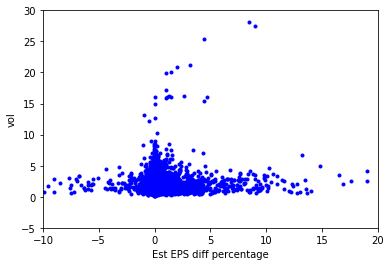

In [743]:
x_label = 'Est EPS diff percentage'
y_label = 'vol'
axis = [-10, 20, -5, 30]
plot(temp_sp500_res, lags, x_label, y_label, axis=axis)

# AMEX

In [37]:
amex_companylist = pd.read_csv(base_dir + 'amex_companylist.csv', header=0)
amex_companylist['Symbol'] = amex_companylist['Symbol'] + ' US'
# amex_tickers = amex_companylist['Symbol'] + ' US'
write_BDS_csv(base_dir + 'amex_eps_hist.csv', amex_companylist['Symbol'])

In [38]:
amex_eps_pull_df = load_df(base_dir + 'amex_eps_pull.csv', 
                                 ['Quarter', 'Date', 'Time', 'Unknown', 'EPS', 'Est EPS'],
                                format_date=True)
cal_eps_diff(amex_eps_pull_df)
amex_eps_dict = load_ticker_dict(amex_eps_pull_df, 'Date', 'Quarter')
write_BHD_price_csv(base_dir + 'amex_BHD_price.csv', amex_companylist['Symbol'])

In [39]:
amex_price_pull = load_df(base_dir + 'amex_BHD_price_pull.csv', ['Date', 'Price'])
for lag in lags:
    add_price_lag(amex_price_pull, lag, forward=forward)
# add_price_lag(amex_price_pull, lag)
amex_ticker_price_dict = load_ticker_dict(amex_price_pull, 'Price', 'Date')
amex_ticker_price_dict = remove_last_n_rows(amex_ticker_price_dict, 4, 1)

In [40]:
amex_tickers = amex_companylist['Symbol']
amex_tickers_df = amex_tickers.to_frame()
for index, row in amex_tickers_df.iterrows():
    ticker = row['Symbol']
    eps_df =  amex_eps_dict[ticker]
    df = eps_df.merge(amex_ticker_price_dict[ticker], on='Date', how='left')
    col_name = 'Price Return lag' + str(lag)
    amex_tickers_df.loc[index, 'Mean ' + col_name] = df[col_name].mean()

amex_tickers_df['Sector'] = amex_companylist['Sector']
amex_tickers_df

,Symbol,Mean Price Return lag4,Sector
0,XXII US,-5.178021,Consumer Non-Durables
1,FAX US,NaN,n/a
2,IAF US,NaN,n/a
3,CH US,NaN,n/a
4,ABE US,NaN,n/a
5,FCO US,NaN,n/a
6,IF US,NaN,n/a
7,ISL US,NaN,n/a
8,ACU US,1.083694,Capital Goods
9,ATNM US,4.571128,Health Care


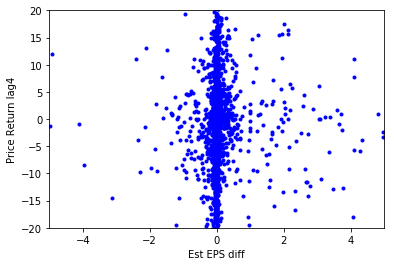

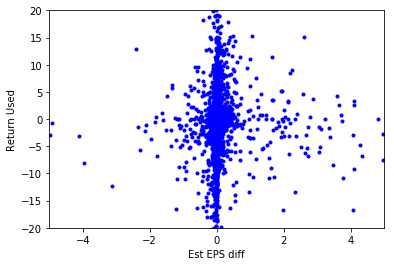

              Est EPS diff  Return Used
Est EPS diff       1.00000      0.17769
Return Used        0.17769      1.00000
                   Est EPS diff  Price Return lag2
Est EPS diff            1.00000            0.16663
Price Return lag2       0.16663            1.00000
                   Est EPS diff  Price Return lag3
Est EPS diff           1.000000           0.153495
Price Return lag3      0.153495           1.000000
                   Est EPS diff  Price Return lag4
Est EPS diff           1.000000           0.147499
Price Return lag4      0.147499           1.000000


In [41]:
amex_res = exchange_eps_price_return_concat(amex_tickers_df, amex_eps_dict, amex_ticker_price_dict)

y_label = 'Price Return lag4'
axis = [-5, 5, -20, 20]
plot(amex_res, lags, 'Est EPS diff', y_label, axis=axis)
plot(amex_res, lags, 'Est EPS diff', 'Return Used', axis=axis)
print amex_res[['Est EPS diff', 'Return Used']].corr(method='spearman')
for lag in lags:
    print amex_res[['Est EPS diff', 'Price Return lag' + str(lag)]].corr(method='spearman')

count: 11783
Return Used return
Max: 1649.29840973, Min: -59.2592592593
Mean: 0.308501848277, Std: 26.9856200505
Avg Absolute Return 5.82627391193


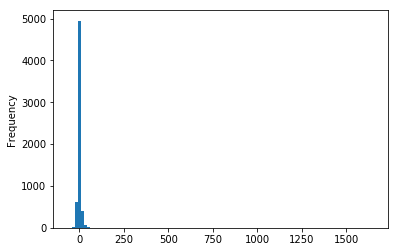

Return Used return
Max: 37.4141161774, Min: -29.375
Mean: -0.885773350997, Std: 7.96759635159
Avg Absolute Return 5.6151279506
Consumer Non-Durables count: 707


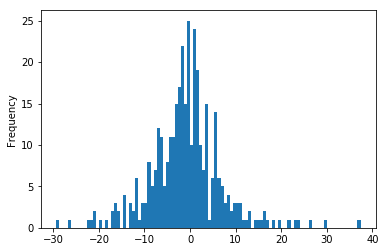

Return Used return
Max: 49.0243902439, Min: -36.7830188679
Mean: -0.668983446797, Std: 7.9486337603
Avg Absolute Return 5.18079785506
Capital Goods count: 1175


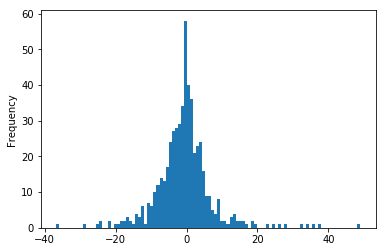

Return Used return
Max: 705.5, Min: -59.2592592593
Mean: 0.0759225084229, Std: 23.5233165866
Avg Absolute Return 6.4110333735
Health Care count: 1968


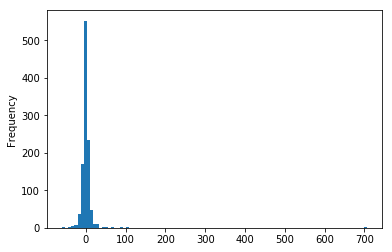

Return Used return
Max: 1649.29840973, Min: -41.0138248848
Mean: 2.07142759022, Std: 61.5007253226
Avg Absolute Return 7.43425516183
Energy count: 1513


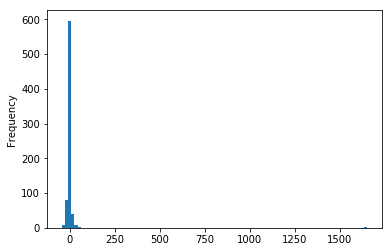

Return Used return
Max: 70.4545454545, Min: -34.668989547
Mean: -0.25671607746, Std: 10.2400261597
Avg Absolute Return 7.00216394506
Technology count: 1072


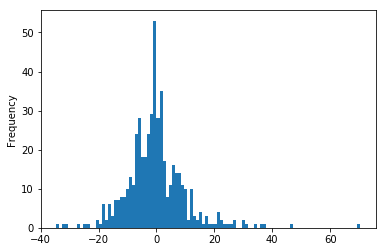

Return Used return
Max: 53.4615384615, Min: -31.843575419
Mean: -0.159347040101, Std: 7.18603074473
Avg Absolute Return 4.76227314053
Basic Industries count: 2209


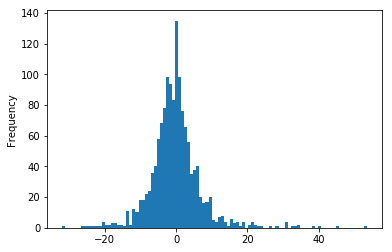

Return Used return
Max: 65.6626506024, Min: -28.2142857143
Mean: 0.569602233831, Std: 6.1602061026
Avg Absolute Return 3.08889604516
Finance count: 719


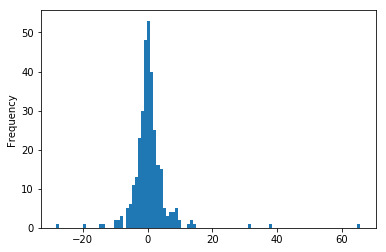

Return Used return
Max: 723.170731707, Min: -48.0
Mean: 0.900914320653, Std: 30.0404524598
Avg Absolute Return 6.30476897186
Consumer Services count: 1423


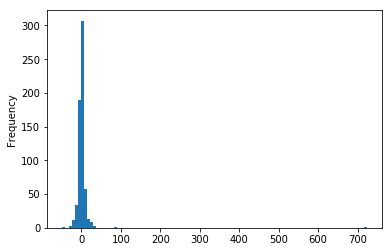

Return Used return
Max: 515.151515152, Min: -27.0833333333
Mean: 2.27846826746, Std: 35.8599067112
Avg Absolute Return 6.97202339791
Public Utilities count: 400


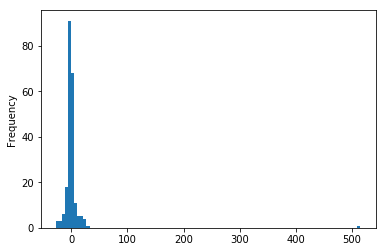

Return Used return
Max: 29.4117647059, Min: -32.9545454545
Mean: 0.0828711374496, Std: 7.10833757303
Avg Absolute Return 4.66246031321
Miscellaneous count: 292


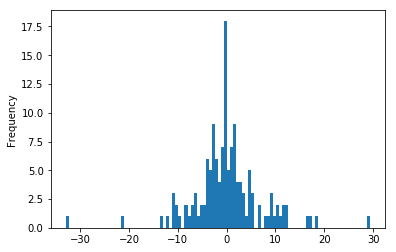

Return Used return
Max: 47.7162293489, Min: -15.4352941176
Mean: 0.326878890052, Std: 8.23359762636
Avg Absolute Return 5.31234113416
Consumer Durables count: 239


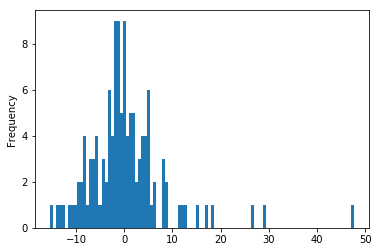

Return Used return
Max: 58.3333333333, Min: -23.7749546279
Mean: -0.987002971932, Std: 16.6780106887
Avg Absolute Return 9.80122918262
n/a count: 21


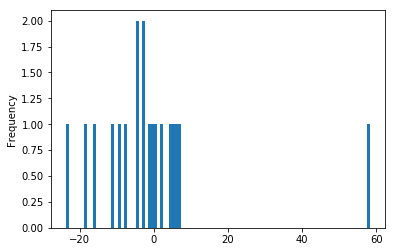

Return Used return
Max: 22.3214285714, Min: -11.0367892977
Mean: 0.934245606423, Std: 7.72695466052
Avg Absolute Return 5.80036133388
Transportation count: 45


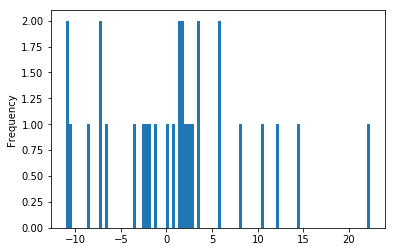

In [42]:
amex_res_df = display_hist(amex_res, industry=True)

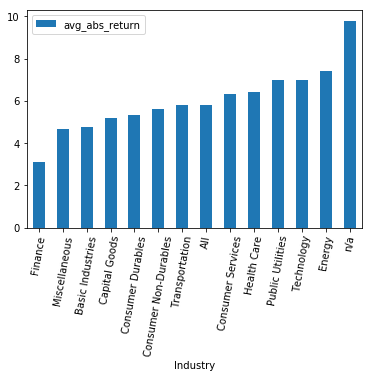

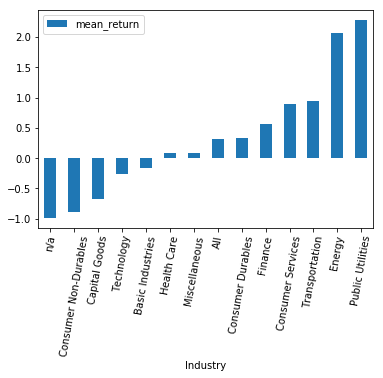

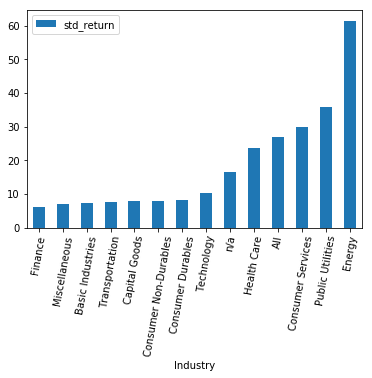

,Industry,avg_abs_return,max_return,mean_return,min_retun,std_return
0,All,5.826274,1649.298410,0.308502,-59.259259,26.985620
1,Consumer Non-Durables,5.615128,37.414116,-0.885773,-29.375000,7.967596
2,Capital Goods,5.180798,49.024390,-0.668983,-36.783019,7.948634
3,Health Care,6.411033,705.500000,0.075923,-59.259259,23.523317
4,Energy,7.434255,1649.298410,2.071428,-41.013825,61.500725
5,Technology,7.002164,70.454545,-0.256716,-34.668990,10.240026
6,Basic Industries,4.762273,53.461538,-0.159347,-31.843575,7.186031
7,Finance,3.088896,65.662651,0.569602,-28.214286,6.160206
8,Consumer Services,6.304769,723.170732,0.900914,-48.000000,30.040452
9,Public Utilities,6.972023,515.151515,2.278468,-27.083333,35.859907


In [43]:
amex_res_df.sort_values('avg_abs_return').plot(x='Industry', y='avg_abs_return', kind='bar', rot =80)
plt.show()

amex_res_df.sort_values('mean_return').plot(x='Industry', y='mean_return', kind='bar', rot =80)
plt.show()

amex_res_df.sort_values('std_return').plot(x='Industry', y='std_return', kind='bar', rot =80)
plt.show()

amex_res_df

# 20 deals from MA

In [44]:
def get_subset_from_deals(deals, subset_id, filename=None):
    subset_deals = deals.loc[deals['Action ID'].isin(subset_id)]
    if filename:
        subset_deals.to_csv(filename, index=False)
    return subset_deals

def eps_price_return_concat(deals, actionid_eps_dict, ticker_price_dict):
    concat_eps_return_list = []
    for index, row in deals.iterrows():
        actionid = row['Action ID']
        target_ticker = row['Target Ticker']
        if str(target_ticker) != 'nan':  # 4 tickers are nan in our MA deals
            eps_df = actionid_eps_dict[actionid]
            df = eps_df.merge(ticker_price_dict[target_ticker], on='Date', how='left')
            df['Action ID'] = actionid
            df['Target Ticker'] = target_ticker
#             if len(df):  # the names that have no eps available will not be shown
#                 print target_ticker
            if len(df):
                df['Return Used'] = [row[choose_return(row['Time'])] for index, row in df.iterrows()]
                concat_eps_return_list.append(df)
    return pd.concat(concat_eps_return_list)

def draw_relationship(actionids, deals, actionid_eps_dict, ticker_price_dict, axis=None, filename=None):
    subset_deals = get_subset_from_deals(deals, actionids, filename=filename)
    res = eps_price_return_concat(subset_deals, actionid_eps_dict, ticker_price_dict)
#     y_label = 'Price Return lag4'
    x_label = 'Est EPS diff'
    x1_label = 'Est EPS diff percentage'
    y_label = 'Return Used'
    plot(res, lags, x_label, y_label, axis=axis, marks='b.')
    plot(res, lags, x1_label, y_label, axis=axis, marks='r.')
#     plot(res, lags, x_label, 'Return Used', axis=axis)

    print res[[x_label, 'Return Used']].corr(method='spearman')
    for lag in lags:
        print res[[x_label, 'Price Return lag' + str(lag)]].corr(method='spearman')

US holiday 2017-11-10T00:00:00.000000000 Fri
US holiday 2016-11-11T00:00:00.000000000 Fri
US holiday 2013-01-21T00:00:00.000000000 Mon
US holiday 2015-07-03T00:00:00.000000000 Fri
US holiday 2016-11-11T00:00:00.000000000 Fri
US holiday 2015-11-11T00:00:00.000000000 Wed
weekend 2012-12-22T00:00:00.000000000 Sat
US holiday 2013-02-18T00:00:00.000000000 Mon
weekend 2012-11-11T00:00:00.000000000 Sun
US holiday 2014-02-17T00:00:00.000000000 Mon
weekend 2016-07-30T00:00:00.000000000 Sat
US holiday 2010-11-11T00:00:00.000000000 Thur
weekend 2016-01-24T00:00:00.000000000 Sun
US holiday 2010-11-25T00:00:00.000000000 Thur
US holiday 2013-11-11T00:00:00.000000000 Mon
US holiday 2011-09-05T00:00:00.000000000 Mon
weekend 2017-07-29T00:00:00.000000000 Sat
US holiday 2017-05-29T00:00:00.000000000 Mon
US holiday 2015-11-26T00:00:00.000000000 Thur
US holiday 2016-02-15T00:00:00.000000000 Mon
weekend 2012-08-05T00:00:00.000000000 Sun
US holiday 2013-11-28T00:00:00.000000000 Thur
US holiday 2015-11-26T00

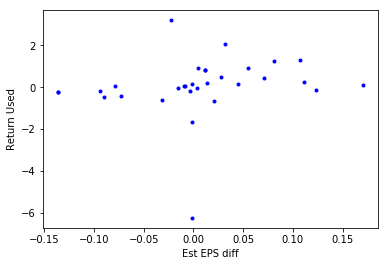

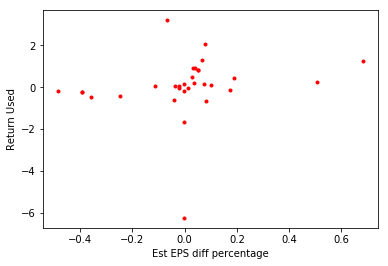

              Est EPS diff  Return Used
Est EPS diff      1.000000     0.527442
Return Used       0.527442     1.000000
                   Est EPS diff  Price Return lag2
Est EPS diff           1.000000           0.298628
Price Return lag2      0.298628           1.000000
                   Est EPS diff  Price Return lag3
Est EPS diff           1.000000           0.208232
Price Return lag3      0.208232           1.000000
                   Est EPS diff  Price Return lag4
Est EPS diff           1.000000           0.183231
Price Return lag4      0.183231           1.000000


In [45]:
tech_twenty_deals_actionid = [113811828,
134117432,
128891212,
73727936,
104686114,
75368792,
57058310,
129491390,
95714499,
76787058,
53392170,
111344916,
85028440,
134278416,
45271062,
105147132,
115060204,
54217001,
92585590,
65982151,
]

draw_relationship(tech_twenty_deals_actionid, ma_deals, actionid_eps_dict, ticker_price_dict, filename='twenty_deals_tech.csv')

Consumer, Non-cyclical


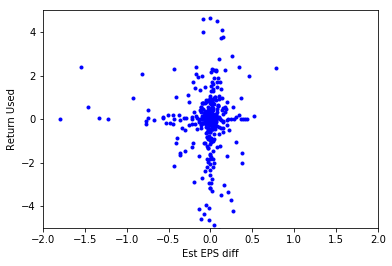

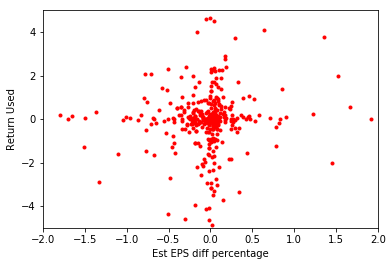

              Est EPS diff  Return Used
Est EPS diff      1.000000     0.070744
Return Used       0.070744     1.000000
                   Est EPS diff  Price Return lag2
Est EPS diff           1.000000           0.075759
Price Return lag2      0.075759           1.000000
                   Est EPS diff  Price Return lag3
Est EPS diff            1.00000            0.06063
Price Return lag3       0.06063            1.00000
                   Est EPS diff  Price Return lag4
Est EPS diff           1.000000           0.046015
Price Return lag4      0.046015           1.000000

Communications


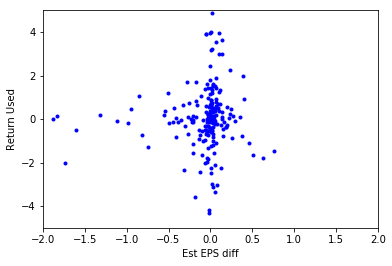

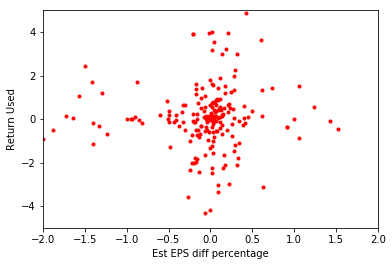

              Est EPS diff  Return Used
Est EPS diff      1.000000     0.141943
Return Used       0.141943     1.000000
                   Est EPS diff  Price Return lag2
Est EPS diff           1.000000           0.039808
Price Return lag2      0.039808           1.000000
                   Est EPS diff  Price Return lag3
Est EPS diff           1.000000           0.062184
Price Return lag3      0.062184           1.000000
                   Est EPS diff  Price Return lag4
Est EPS diff           1.000000           0.046481
Price Return lag4      0.046481           1.000000

Energy


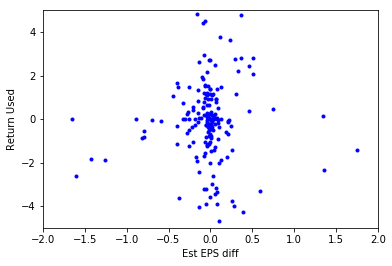

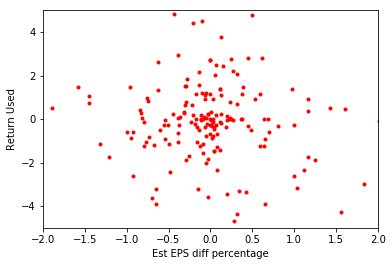

              Est EPS diff  Return Used
Est EPS diff      1.000000     0.011672
Return Used       0.011672     1.000000
                   Est EPS diff  Price Return lag2
Est EPS diff           1.000000          -0.034332
Price Return lag2     -0.034332           1.000000
                   Est EPS diff  Price Return lag3
Est EPS diff           1.000000          -0.056851
Price Return lag3     -0.056851           1.000000
                   Est EPS diff  Price Return lag4
Est EPS diff           1.000000          -0.019774
Price Return lag4     -0.019774           1.000000

Basic Materials


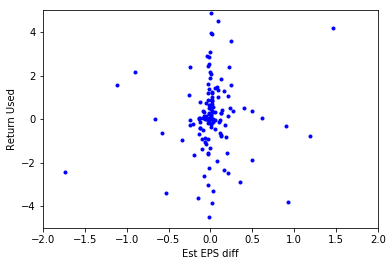

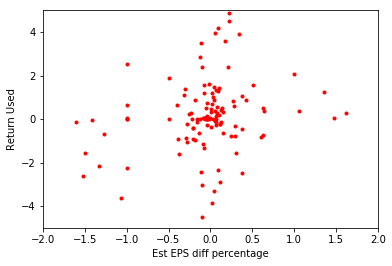

              Est EPS diff  Return Used
Est EPS diff       1.00000      0.16364
Return Used        0.16364      1.00000
                   Est EPS diff  Price Return lag2
Est EPS diff           1.000000           0.148084
Price Return lag2      0.148084           1.000000
                   Est EPS diff  Price Return lag3
Est EPS diff           1.000000           0.140002
Price Return lag3      0.140002           1.000000
                   Est EPS diff  Price Return lag4
Est EPS diff           1.000000           0.056144
Price Return lag4      0.056144           1.000000

Technology


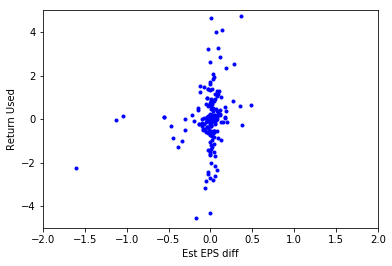

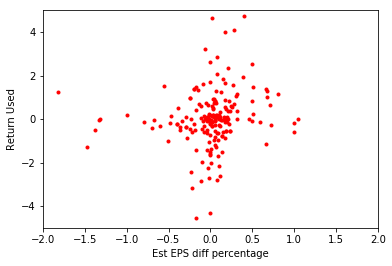

              Est EPS diff  Return Used
Est EPS diff      1.000000     0.310322
Return Used       0.310322     1.000000
                   Est EPS diff  Price Return lag2
Est EPS diff           1.000000           0.157653
Price Return lag2      0.157653           1.000000
                   Est EPS diff  Price Return lag3
Est EPS diff           1.000000           0.111125
Price Return lag3      0.111125           1.000000
                   Est EPS diff  Price Return lag4
Est EPS diff           1.000000           0.108338
Price Return lag4      0.108338           1.000000

Diversified


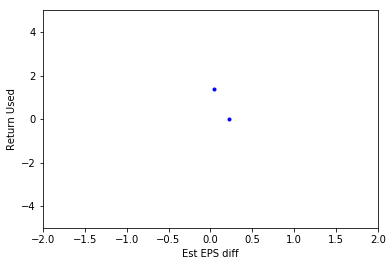

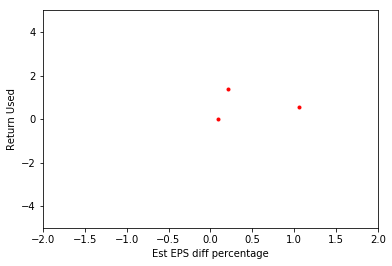

              Est EPS diff  Return Used
Est EPS diff           1.0         -0.5
Return Used           -0.5          1.0
                   Est EPS diff  Price Return lag2
Est EPS diff                1.0               -0.5
Price Return lag2          -0.5                1.0
                   Est EPS diff  Price Return lag3
Est EPS diff                1.0                1.0
Price Return lag3           1.0                1.0
                   Est EPS diff  Price Return lag4
Est EPS diff                1.0                1.0
Price Return lag4           1.0                1.0

Industrial


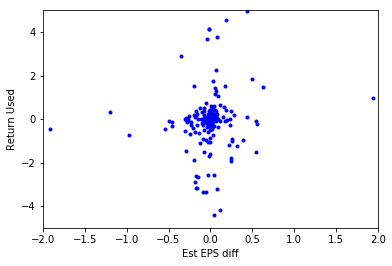

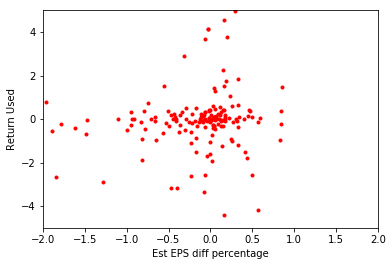

              Est EPS diff  Return Used
Est EPS diff      1.000000     0.165568
Return Used       0.165568     1.000000
                   Est EPS diff  Price Return lag2
Est EPS diff           1.000000           0.248813
Price Return lag2      0.248813           1.000000
                   Est EPS diff  Price Return lag3
Est EPS diff           1.000000           0.238505
Price Return lag3      0.238505           1.000000
                   Est EPS diff  Price Return lag4
Est EPS diff           1.000000           0.186277
Price Return lag4      0.186277           1.000000

Financial


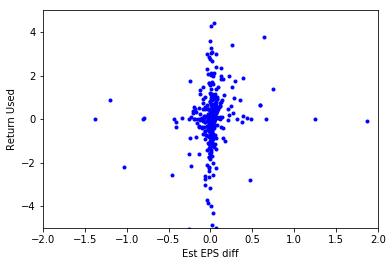

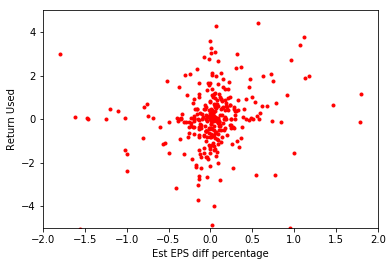

              Est EPS diff  Return Used
Est EPS diff      1.000000     0.207584
Return Used       0.207584     1.000000
                   Est EPS diff  Price Return lag2
Est EPS diff           1.000000           0.162202
Price Return lag2      0.162202           1.000000
                   Est EPS diff  Price Return lag3
Est EPS diff           1.000000           0.076132
Price Return lag3      0.076132           1.000000
                   Est EPS diff  Price Return lag4
Est EPS diff           1.000000           0.069815
Price Return lag4      0.069815           1.000000

Consumer, Cyclical


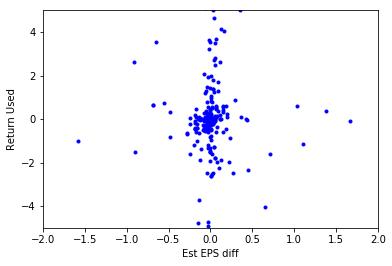

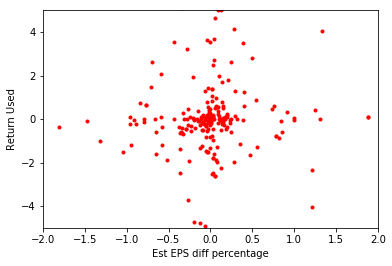

              Est EPS diff  Return Used
Est EPS diff      1.000000     0.159801
Return Used       0.159801     1.000000
                   Est EPS diff  Price Return lag2
Est EPS diff           1.000000           0.185587
Price Return lag2      0.185587           1.000000
                   Est EPS diff  Price Return lag3
Est EPS diff           1.000000           0.208672
Price Return lag3      0.208672           1.000000
                   Est EPS diff  Price Return lag4
Est EPS diff           1.000000           0.172322
Price Return lag4      0.172322           1.000000

Utilities


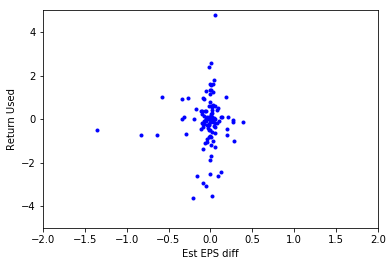

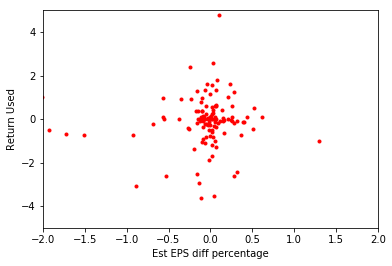

              Est EPS diff  Return Used
Est EPS diff      1.000000     0.057848
Return Used       0.057848     1.000000
                   Est EPS diff  Price Return lag2
Est EPS diff           1.000000           0.160009
Price Return lag2      0.160009           1.000000
                   Est EPS diff  Price Return lag3
Est EPS diff           1.000000           0.070354
Price Return lag3      0.070354           1.000000
                   Est EPS diff  Price Return lag4
Est EPS diff           1.000000           0.044908
Price Return lag4      0.044908           1.000000



In [46]:
for industry in ma_deals['Target Industry Sector'].unique():
    actionids = ma_deals[ma_deals['Target Industry Sector'] == industry]['Action ID']
    print industry
    axis = [-2, 2, -5, 5]
    draw_relationship(actionids, ma_deals, actionid_eps_dict, ticker_price_dict, axis=axis)
    print

In [56]:
# for industry in ma_deals['Target Industry Sector'].unique():
#     subset_deals = ma_deals[ma_deals['Target Industry Sector'] == industry]
#     subset_deals = subset_deals[subset_deals['Payment Type'] != 'Cash']
#     actionids = subset_deals['Action ID']
#     print industry
#     axis = [-2, 2, -5, 5]
#     draw_relationship(actionids, ma_deals, actionid_eps_dict, ticker_price_dict, axis=axis)
#     print

Stock


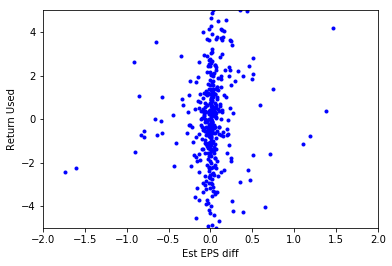

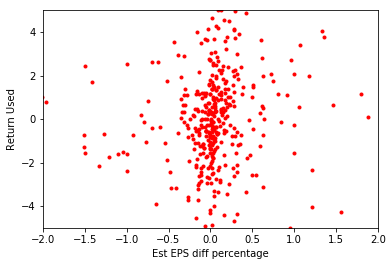

              Est EPS diff  Return Used
Est EPS diff      1.000000     0.195391
Return Used       0.195391     1.000000
                   Est EPS diff  Price Return lag2
Est EPS diff           1.000000           0.177546
Price Return lag2      0.177546           1.000000
                   Est EPS diff  Price Return lag3
Est EPS diff           1.000000           0.162589
Price Return lag3      0.162589           1.000000
                   Est EPS diff  Price Return lag4
Est EPS diff           1.000000           0.098354
Price Return lag4      0.098354           1.000000

Cash


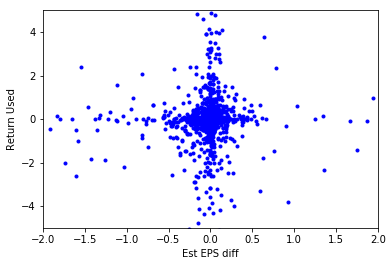

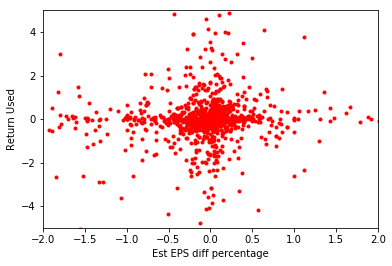

              Est EPS diff  Return Used
Est EPS diff      1.000000     0.112991
Return Used       0.112991     1.000000
                   Est EPS diff  Price Return lag2
Est EPS diff             1.0000             0.0963
Price Return lag2        0.0963             1.0000
                   Est EPS diff  Price Return lag3
Est EPS diff           1.000000           0.074512
Price Return lag3      0.074512           1.000000
                   Est EPS diff  Price Return lag4
Est EPS diff           1.000000           0.073842
Price Return lag4      0.073842           1.000000

Cash and Stock


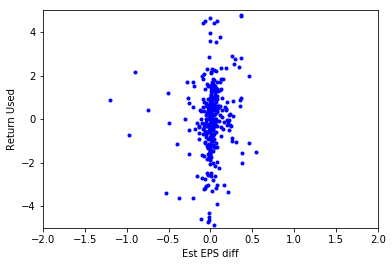

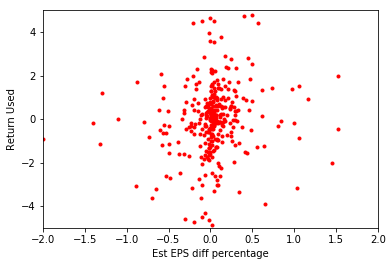

              Est EPS diff  Return Used
Est EPS diff      1.000000     0.178085
Return Used       0.178085     1.000000
                   Est EPS diff  Price Return lag2
Est EPS diff           1.000000           0.136209
Price Return lag2      0.136209           1.000000
                   Est EPS diff  Price Return lag3
Est EPS diff           1.000000           0.095255
Price Return lag3      0.095255           1.000000
                   Est EPS diff  Price Return lag4
Est EPS diff           1.000000           0.095807
Price Return lag4      0.095807           1.000000

Cash or Stock


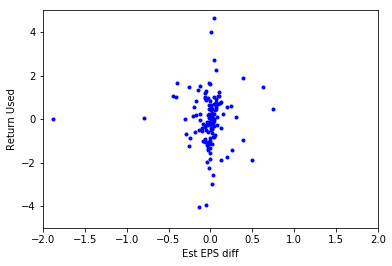

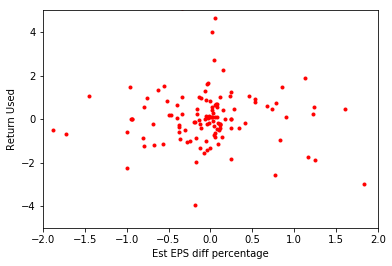

              Est EPS diff  Return Used
Est EPS diff      1.000000     0.095706
Return Used       0.095706     1.000000
                   Est EPS diff  Price Return lag2
Est EPS diff           1.000000           0.033928
Price Return lag2      0.033928           1.000000
                   Est EPS diff  Price Return lag3
Est EPS diff           1.000000          -0.026206
Price Return lag3     -0.026206           1.000000
                   Est EPS diff  Price Return lag4
Est EPS diff           1.000000          -0.003768
Price Return lag4     -0.003768           1.000000



In [57]:
for payment_type in ma_deals['Payment Type'].unique():
    subset_deals = ma_deals[ma_deals['Payment Type'] == payment_type]
    actionids = subset_deals['Action ID']
    print payment_type
    axis = [-2, 2, -5, 5]
    draw_relationship(actionids, ma_deals, actionid_eps_dict, ticker_price_dict, axis=axis)
    print